# Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

# Deliverables

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 
<br><br>





# Data Description
<br>
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

<script>
function code_toggle() {
  $('div.input').each(function(id, el) {
    if ($(el).is(':visible')) {
      $(el).hide();
    } else {
      $(el).show();
    }
  });
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>


In [66]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
import io
# Initialize the image buffer only once
buffer = io.BytesIO()
import base64
import os
import sys
sys.path.append(os.getcwd())
from BarPlotter import create_stacked_bar_plot, create_stacked_bar_plot_multi, create_overall_stacked_bar_plot,create_stacked_bar_plot_with_filters, create_subplot_grid, save_plot_as_base64
from IPython.display import Markdown



<div align="center">

# Problems


</div>

## Use the prompts below to get started with your data analysis.  

# 1. Read in the `coupons.csv` file.




In [41]:
distinct_values_df = pd.DataFrame({
    'Column Name': df.columns,
    'Number of Distinct Values': [df[column].nunique() for column in df.columns]
})

print(distinct_values_df)

             Column Name  Number of Distinct Values
0            destination                          3
1              passanger                          4
2                weather                          3
3            temperature                          3
4                   time                          5
5                 coupon                          5
6             expiration                          2
7                 gender                          2
8                    age                          8
9          maritalStatus                          5
10          has_children                          2
11             education                          6
12            occupation                         25
13                income                          9
14                   car                          5
15                   Bar                          5
16           CoffeeHouse                          5
17             CarryAway                          5
18  Restaura

##### utility functions

# 2. Investigate the dataset for missing or problematic data.

# 3. Decide what to do about your missing data -- drop, replace, other...


# Analysis of Missing Data in the Dataset - Actions Taken



## Key Observations and Actions Taken

1. **Column: 'car'**
   - **Observation**: A significant portion of missing values (12,576 or approximately 99.15% of the dataset).
   - **Action Taken**: Decided to **drop the 'car' column** from the dataset. Given the high volume of missing data, this column is deemed not useful for further analysis.

2. **Columns: 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'**
   - **Observations**:
     - 'CoffeeHouse': 217 missing values (about 1.71% of the dataset).
     - 'Restaurant20To50': 189 missing values (approximately 1.49%).
     - 'CarryAway': 151 missing values (around 1.19%).
     - 'RestaurantLessThan20': 130 missing values (about 1.02%).
     - 'Bar': 107 missing values (approximately 0.84%).
   - **Action Taken**: For these columns with relatively fewer missing values, I have opted to fill the missing data with a placeholder value **"no answer"**. This approach retains the integrity of the dataset while addressing the issue of missing data.
<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                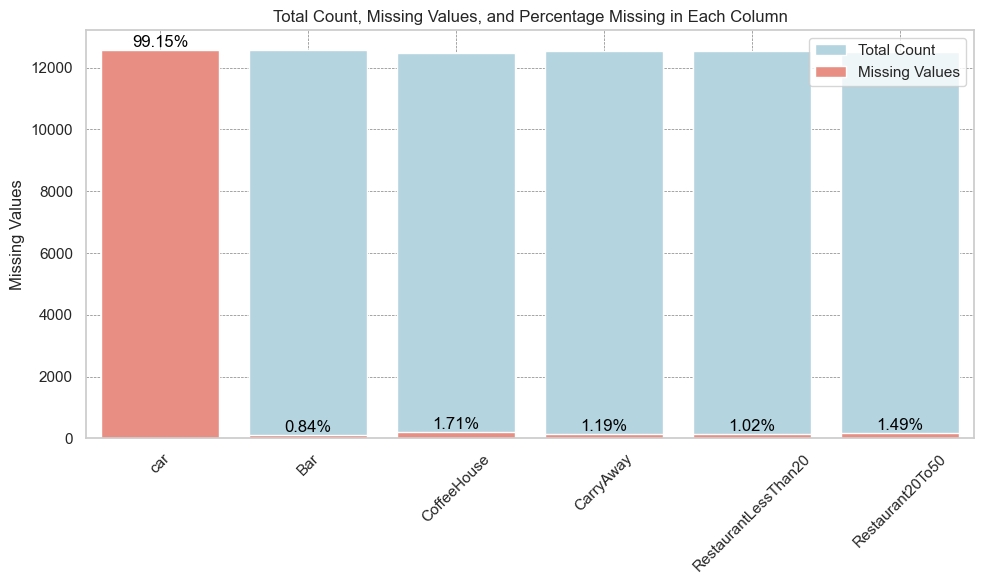
                <em>Figure: Missing Data</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                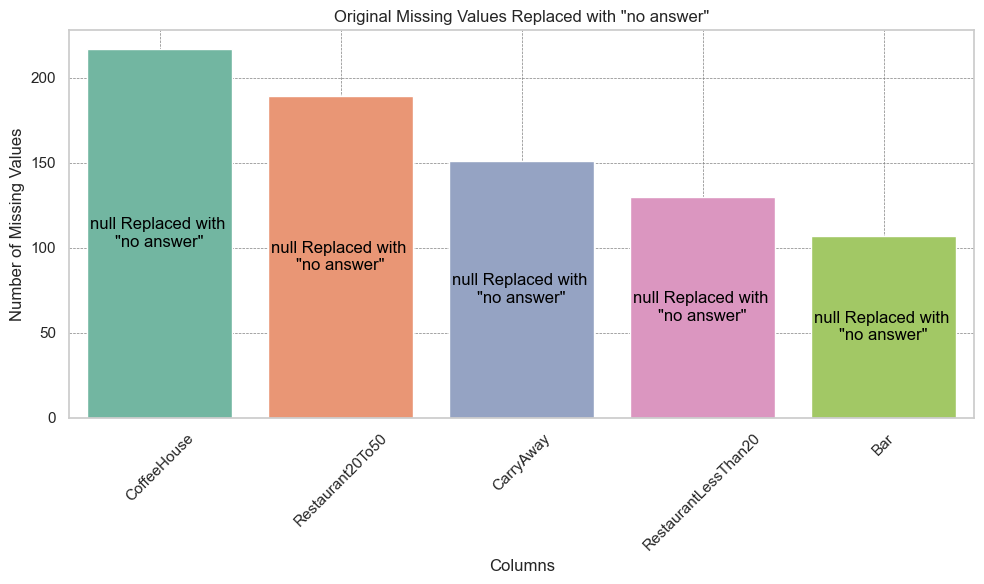
                <em>Figure: Cleaned up Data</em>
            </td>
        </tr>
    </table>
</div>



   

## Conclusion
By dropping the 'car' column and imputing missing values in other columns with "no answer", the dataset is now more robust and suitable for a comprehensive analysis. These actions help mitigate the impact of missing data on the study's outcomes and ensure a more accurate interpretation of the results.


In [42]:




# Calculating the total count, missing values and percentage of missing values for each column
total_count = df.count()
missing_values = df.isnull().sum()

# Recalculating the percentage of missing values correctly
percent_missing = (missing_values / df.shape[0]) * 100


# Creating a DataFrame for visualization
visualization_df = pd.DataFrame({
    'Total Count': total_count,
    'Missing Values': missing_values,
    'Percentage Missing': percent_missing
})

# Updating the DataFrame for visualization
visualization_df['Percentage Missing'] = percent_missing
visualization_df = visualization_df[visualization_df['Percentage Missing'] > 0]

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Creating a bar plot for Total Count and Missing Values
ax = sns.barplot(x=visualization_df.index, y='Total Count', data=visualization_df, color='lightblue', label='Total Count')
sns.barplot(x=visualization_df.index, y='Missing Values', data=visualization_df, color='salmon', label='Missing Values')

# Adding Percentage Missing as text on the bars
for index, value in enumerate(visualization_df['Percentage Missing']):
   
     plt.text(index, visualization_df['Missing Values'][index], f'{value:.2f}%', color='black', ha="center", va="bottom")

# plt.xticks(rotation=30)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.title('Total Count, Missing Values, and Percentage Missing in Each Column')
plt.legend()

# plt.xticks(rotation=45)
# plt.tight_layout()
# buffer.seek(0)
# plt.savefig(buffer, format='png')
# plt.close()

# Encode the first plot image as a base64 string
missing_data_image64 = save_plot_as_base64(buffer, plt, 45)


# drop the column 'car'
df_cleaned = df.drop('car', axis=1)

# List of columns to update
columns_to_update = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Replace NaN with  'no answer'
for column in columns_to_update:
    df_cleaned[column].fillna('no answer', inplace=True)  
    
# Including only the selected columns for missing values calculation
selected_columns = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']

# Calculating missing values for the selected columns
missing_values_selected = df[selected_columns].isna().sum()
missing_values_selected = missing_values_selected.to_dict()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=list(missing_values_selected.keys()), y=list(missing_values_selected.values()), palette='Set2')

# Adding annotations
for index, value in enumerate(missing_values_selected.values()):
    plt.text(index, value/2, f'null Replaced with \n"no answer"', color='black', ha="center", va="center")

plt.title('Original Missing Values Replaced with "no answer"')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()



# Encode the first plot image as a base64 string
no_answer_image64 = save_plot_as_base64(buffer, plt,45)


markdown_text = f"""
# Analysis of Missing Data in the Dataset - Actions Taken



## Key Observations and Actions Taken

1. **Column: 'car'**
   - **Observation**: A significant portion of missing values (12,576 or approximately 99.15% of the dataset).
   - **Action Taken**: Decided to **drop the 'car' column** from the dataset. Given the high volume of missing data, this column is deemed not useful for further analysis.

2. **Columns: 'CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'**
   - **Observations**:
     - 'CoffeeHouse': 217 missing values (about 1.71% of the dataset).
     - 'Restaurant20To50': 189 missing values (approximately 1.49%).
     - 'CarryAway': 151 missing values (around 1.19%).
     - 'RestaurantLessThan20': 130 missing values (about 1.02%).
     - 'Bar': 107 missing values (approximately 0.84%).
   - **Action Taken**: For these columns with relatively fewer missing values, I have opted to fill the missing data with a placeholder value **"no answer"**. This approach retains the integrity of the dataset while addressing the issue of missing data.
<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{missing_data_image64}" alt="Missing Data" style="width: 100%;"/>
                <em>Figure: Missing Data</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{no_answer_image64}" style="width: 100%;"/>
                <em>Figure: Cleaned up Data</em>
            </td>
        </tr>
    </table>
</div>



   

## Conclusion
By dropping the 'car' column and imputing missing values in other columns with "no answer", the dataset is now more robust and suitable for a comprehensive analysis. These actions help mitigate the impact of missing data on the study's outcomes and ensure a more accurate interpretation of the results.
"""

display(Markdown(markdown_text))



Assertions passed: Data is consistent.



# Analysis and Transformation of Travel Time Data

## Overview

Our dataset contains three pivotal columns - `toCoupon_GEQ5min`, `toCoupon_GEQ15min`, and `toCoupon_GEQ25min`. These columns represent the GPS-calculated travel times to the coupon's destination, specifically whether the destination is within 5, 15, or 25 minutes of the user's current location.

## Logical Consistency Check

The first step in our analysis was to verify the logical consistency across these travel time columns. The expectation was that if a destination is within 25 minutes (`toCoupon_GEQ25min` = 1), it should also be within 15 and 5 minutes (`toCoupon_GEQ15min` = 1 and `toCoupon_GEQ5min` = 1). Similarly, if a destination is within 15 minutes (`toCoupon_GEQ15min` = 1), it should also be within 5 minutes (`toCoupon_GEQ5min` = 1).

## Consistency Findings

Upon analyzing the dataset, we found no inconsistencies. This indicates that the travel time data accurately represents the distances to the destinations.

## Data Simplification

With the data confirmed to be consistent, we combined these three columns into a single column named `travel_time_category`. This new column simplifies the data by categorizing the actual travel time to the coupon destination. The categories are as follows:
- 'Within 5 min': Destination is within 5 minutes travel time.
- 'Within 15 min': Destination is within 15 minutes travel time.
- 'Within 25 min': Destination is within 25 minutes travel time.
- 'More than 25 min': Destination is more than 25 minutes away.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                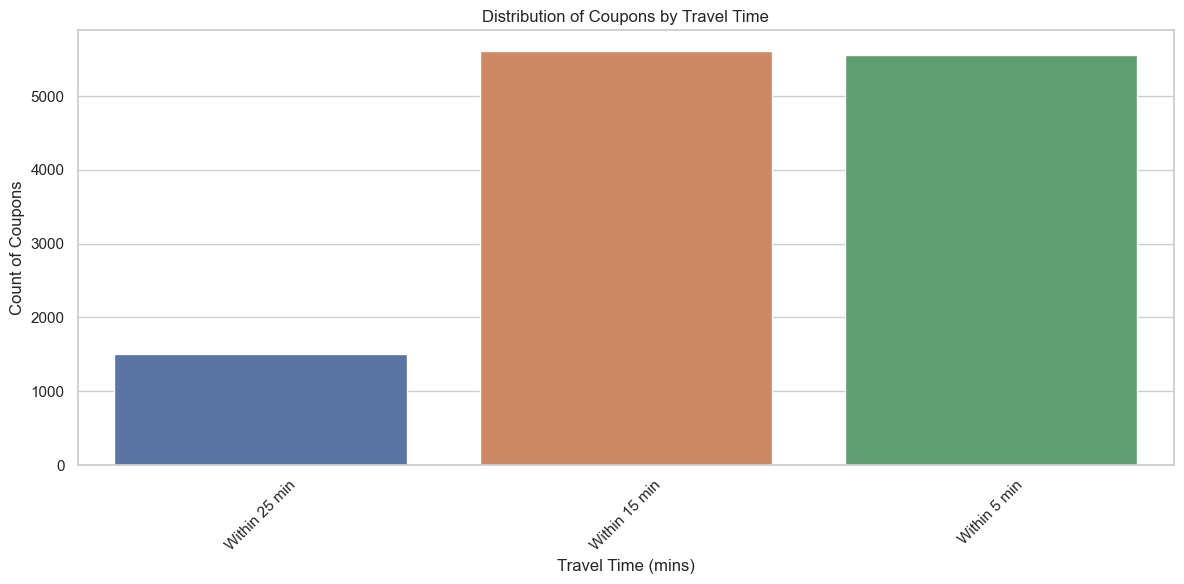
                <em>Figure: Distribution By Travel Time</em>
            </td>
        </tr>
    </table>
</div>

### Conclusion

Transforming the travel time data into a single categorical column will make our subsequent analyses more streamlined and insightful. It allows for a clearer understanding of the geographical reach of the coupons and the actual travel times involved, which is crucial for interpreting user behavior and preferences in relation to coupon usage.



In [43]:
# Check for logical consistency of the gps columns. <=5 mins should imply <= 15 mins and <= 25 mins
# Check for logical consistency
inconsistency_25 = df_cleaned[(df_cleaned['toCoupon_GEQ25min'] == 1) & ((df_cleaned['toCoupon_GEQ15min'] == 0) | (df_cleaned['toCoupon_GEQ5min'] == 0))]
inconsistency_15 = df_cleaned[(df_cleaned['toCoupon_GEQ15min'] == 1) & (df_cleaned['toCoupon_GEQ5min'] == 0)]

# Using assert statements to ensure the inconsistency counts are 0
assert inconsistency_25.shape[0] == 0, "There are inconsistencies with toCoupon_GEQ25min"
assert inconsistency_15.shape[0] == 0, "There are inconsistencies with toCoupon_GEQ15min"

# If the script reaches this point, the assertions have passed
print("Assertions passed: Data is consistent.")


# Create a new column 'travel_time_category' using data from the 3 Geo Location Columns
conditions = [
    (df_cleaned['toCoupon_GEQ25min'] == 1),
    (df_cleaned['toCoupon_GEQ15min'] == 1),
    (df_cleaned['toCoupon_GEQ5min'] == 1)
]
choices = ['Within 25 min', 'Within 15 min', 'Within 5 min']
df_cleaned['travel_time_category'] = np.select(conditions, choices, default='More than 25 min')
df_cleaned['travel_time_category'] = df_cleaned['travel_time_category'].astype(str)
# Now df has an additional column 'travel_time_category' that simplifies the travel time information


# Plotting the distribution of accepted coupons by income bracket
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='travel_time_category', order=choices)
plt.title('Distribution of Coupons by Travel Time')
plt.xlabel('Travel Time (mins)')
plt.ylabel('Count of Coupons')


# Encode the first plot image as a base64 string
travel_time_image64 = save_plot_as_base64(buffer, plt, 45)

markdown_text = f"""
# Analysis and Transformation of Travel Time Data

## Overview

Our dataset contains three pivotal columns - `toCoupon_GEQ5min`, `toCoupon_GEQ15min`, and `toCoupon_GEQ25min`. These columns represent the GPS-calculated travel times to the coupon's destination, specifically whether the destination is within 5, 15, or 25 minutes of the user's current location.

## Logical Consistency Check

The first step in our analysis was to verify the logical consistency across these travel time columns. The expectation was that if a destination is within 25 minutes (`toCoupon_GEQ25min` = 1), it should also be within 15 and 5 minutes (`toCoupon_GEQ15min` = 1 and `toCoupon_GEQ5min` = 1). Similarly, if a destination is within 15 minutes (`toCoupon_GEQ15min` = 1), it should also be within 5 minutes (`toCoupon_GEQ5min` = 1).

## Consistency Findings

Upon analyzing the dataset, we found no inconsistencies. This indicates that the travel time data accurately represents the distances to the destinations.

## Data Simplification

With the data confirmed to be consistent, we combined these three columns into a single column named `travel_time_category`. This new column simplifies the data by categorizing the actual travel time to the coupon destination. The categories are as follows:
- 'Within 5 min': Destination is within 5 minutes travel time.
- 'Within 15 min': Destination is within 15 minutes travel time.
- 'Within 25 min': Destination is within 25 minutes travel time.
- 'More than 25 min': Destination is more than 25 minutes away.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{travel_time_image64}" alt="Distribution By Travel Time" style="width: 100%;"/>
                <em>Figure: Distribution By Travel Time</em>
            </td>
        </tr>
    </table>
</div>

### Conclusion

Transforming the travel time data into a single categorical column will make our subsequent analyses more streamlined and insightful. It allows for a clearer understanding of the geographical reach of the coupons and the actual travel times involved, which is crucial for interpreting user behavior and preferences in relation to coupon usage.

"""
display(Markdown(markdown_text))


# Analysis and Transformation of Income Data

<br>

## Mapping Multiple Incomes to 3 Specific Income Brackets

In the process of analyzing the income ranges in our dataset, it was decided that categorizing the data into three specific income brackets would be optimal for our analysis. These brackets are defined as:

- Low Income (less than 25K)
- Mid Income (25K to 75K)
- High Income (75K or more)

To facilitate this, we have retained the original 'income' column, which categorizes income in increments of $12,500. Additionally, a new column named 'income_bracket' has been added to the dataset. This new column categorizes each entry into one of the three defined income brackets (Low, Mid, High) based on their income value.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                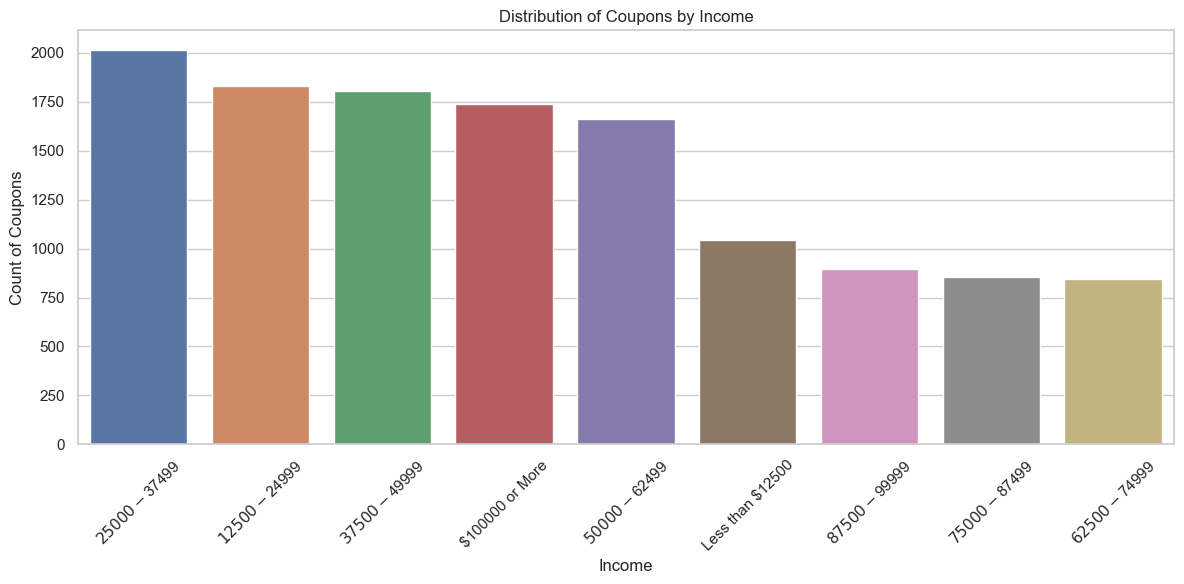
                <em>Figure: Distribution By Income</em>
            </td>
        <tr>
        </tr>
            <td style="text-align: center;">
                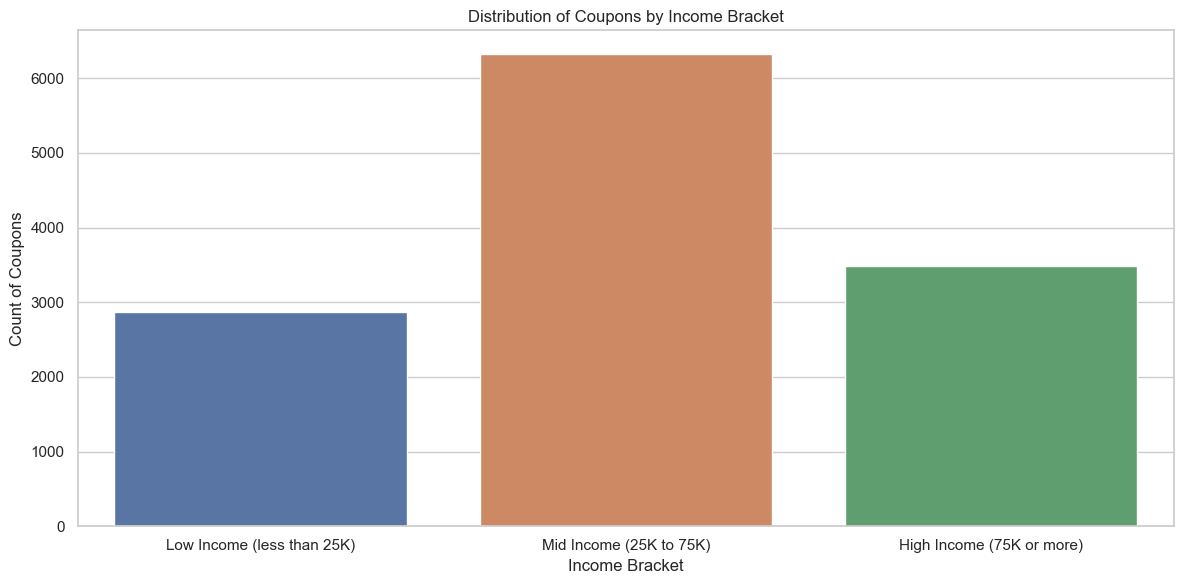
                <em>Figure: Distribution By Income Brackets</em>
            </td>
        </tr>
    </table>
</div>



In [44]:

# Define the function to categorize income into three ranges
def categorize_income(income):
    low_income_brackets = ['Less than $12500', '$12500 - $24999']
    mid_income_brackets = ['$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999']
    high_income_brackets = ['$75000 - $87499', '$87500 - $99999', '$100000 or More']

    if income in low_income_brackets:
        return 'Low Income (less than 25K)'
    elif income in mid_income_brackets:
        return 'Mid Income (25K to 75K)'
    else:
        return 'High Income (75K or more)'

# Apply the function to the 'income' column and create a new column
df_cleaned['income_bracket'] = df_cleaned['income'].apply(categorize_income)

# Plotting the distribution of accepted coupons by income
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='income', order=df_cleaned['income'].value_counts().index)
plt.title('Distribution of Coupons by Income')
plt.xlabel('Income')
plt.ylabel('Count of Coupons')



# Encode the first plot image as a base64 string
income_image64 = save_plot_as_base64(buffer, plt,45)




# Plotting the distribution of accepted coupons by income bracket
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='income_bracket', order=['Low Income (less than 25K)','Mid Income (25K to 75K)','High Income (75K or more)'])
plt.title('Distribution of Coupons by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count of Coupons')




# Encode the first plot image as a base64 string
income_bracket_image64 =save_plot_as_base64(buffer, plt)




markdown_text = f"""
# Analysis and Transformation of Income Data

<br>

## Mapping Multiple Incomes to 3 Specific Income Brackets

In the process of analyzing the income ranges in our dataset, it was decided that categorizing the data into three specific income brackets would be optimal for our analysis. These brackets are defined as:

- Low Income (less than 25K)
- Mid Income (25K to 75K)
- High Income (75K or more)

To facilitate this, we have retained the original 'income' column, which categorizes income in increments of $12,500. Additionally, a new column named 'income_bracket' has been added to the dataset. This new column categorizes each entry into one of the three defined income brackets (Low, Mid, High) based on their income value.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{income_image64}" alt="Coupons Distribution By Income" style="width: 100%;"/>
                <em>Figure: Distribution By Income</em>
            </td>
        <tr>
        </tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{income_bracket_image64}" alt="Coupons Distribution By Income Bracket" style="width: 100%;"/>
                <em>Figure: Distribution By Income Brackets</em>
            </td>
        </tr>
    </table>
</div>

"""

display(Markdown(markdown_text))

In [45]:
# Replace specific age values with age ranges
age_replacements = {
    '21': '21-25',
    '26': '26-30',
    '31': '31-35',
    '36': '36-40',
    '41': '41-45',
    '46': '46-50'
}

# Apply the replacements to the 'age' column
df_cleaned['age'] = df_cleaned['age'].replace(age_replacements)

# fix typo in column name
df_cleaned.rename(columns={'passanger': 'passenger'}, inplace=True)


# This will only change the values for '21', '26', '31', '36', '41', and '46'.
# The values 'below21' and '50plus' will remain unchanged.
markdown_text = f"""
<br><br>
# Addressing Other Data Inconsistencies

## Inconsistently Named Entries in 'age' Column
In our dataset, the **'age'** column, which is integral to our analysis, presented a data inconsistency issue. This column is of string type, but it contained values that were not effectively conveying the age groups. Specifically, the values **'below21' and '50plus'** were used, but other age groups were represented by single ages. This inconsistency could lead to issues in analyses that require clearly defined age groups.

The initial analysis of the 'age' column with `value_counts()` revealed the following distribution:

- 21: 2653 entries
- 26: 2559 entries
- 31: 2039 entries
- 50plus: 1788 entries
- 36: 1319 entries
- 41: 1093 entries
- 46: 686 entries
- below21: 547 entries

To address this issue, the following replacements were made:

- '21' was replaced with '21-25'
- '26' was replaced with '26-30'
- '31' was replaced with '31-35'
- '36' was replaced with '36-40'
- '41' was replaced with '41-45'
- '46' was replaced with '46-49'
- 'below21' and '50plus' were retained as they are**

## Missspelled 'passenger' Column Renamed

The column name 'passanger' was identified as a typo and has been corrected to 'passenger'.


"""

display(Markdown(markdown_text))




<br><br>
# Addressing Other Data Inconsistencies

## Inconsistently Named Entries in 'age' Column
In our dataset, the **'age'** column, which is integral to our analysis, presented a data inconsistency issue. This column is of string type, but it contained values that were not effectively conveying the age groups. Specifically, the values **'below21' and '50plus'** were used, but other age groups were represented by single ages. This inconsistency could lead to issues in analyses that require clearly defined age groups.

The initial analysis of the 'age' column with `value_counts()` revealed the following distribution:

- 21: 2653 entries
- 26: 2559 entries
- 31: 2039 entries
- 50plus: 1788 entries
- 36: 1319 entries
- 41: 1093 entries
- 46: 686 entries
- below21: 547 entries

To address this issue, the following replacements were made:

- '21' was replaced with '21-25'
- '26' was replaced with '26-30'
- '31' was replaced with '31-35'
- '36' was replaced with '36-40'
- '41' was replaced with '41-45'
- '46' was replaced with '46-49'
- 'below21' and '50plus' were retained as they are**

## Missspelled 'passenger' Column Renamed

The column name 'passanger' was identified as a typo and has been corrected to 'passenger'.




In [46]:

# df_cleaned['Bar'] = df_cleaned['Bar'].astype(str)

<br><br><br><br><br>
# 4. What proportion of the total observations chose to accept the coupon? 
<br><br>





# Overall Coupon Acceptance Rate


The proportion of **12684** total observations that chose to accept the coupon is **7210** or  **56.84%**.

<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                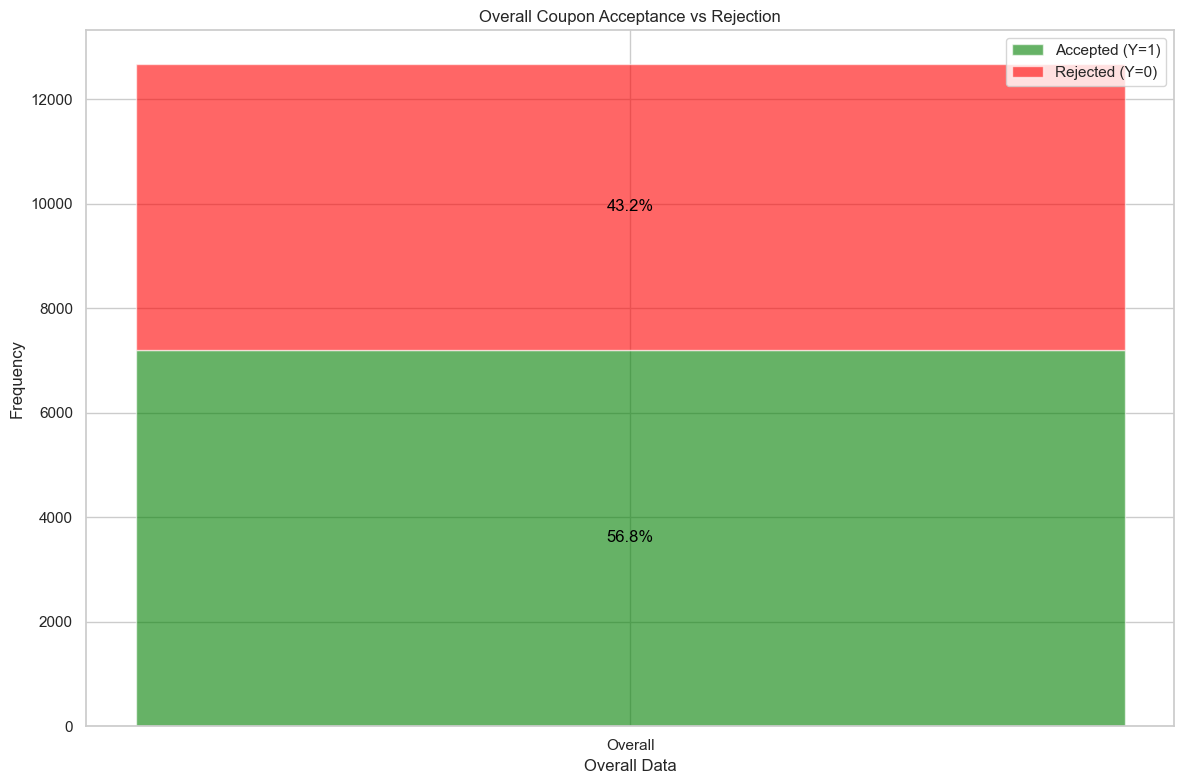
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>






In [9]:

total_count = len(df_cleaned)
accepted_count = df_cleaned['Y'].value_counts()
proportion_data = accepted_count / total_count


coupon_overall_acceptance_image64 = create_overall_stacked_bar_plot('Overall Coupon Acceptance vs Rejection', df_cleaned, rotation=0, yscale='linear')



markdown_text = f"""


# Overall Coupon Acceptance Rate


The proportion of **{total_count}** total observations that chose to accept the coupon is **{accepted_count[1]}** or  **{proportion_data[1]:.2%}**.

<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coupon_overall_acceptance_image64}" alt="Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>




"""

display(Markdown(markdown_text))


<br><br><br>
# 5. Use a bar plot to visualize the `coupon` column.

In [47]:
df_cleaned['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64




# Analysis of Coupon Distribution and Acceptance Rates

## Distribution of Coupons

The 'Coffee House' coupons were the most distributed (3,996 instances), indicating a strong emphasis on this category. This was followed by 'Restaurant(<20)', 'Carry out & Take away', 'Bar', and 'Restaurant(20-50)' in decreasing order of frequency.

### Analysis of Acceptance Rates Across Coupon Types

The analysis of coupon acceptance rates across different coupon types reveals distinct trends:

1. **Coffee House Coupon Type**: 
   - **Frequency**: Highest among all coupon types.
   - **Acceptance Rate**: Approximately 50%.
   - **Insight**: Indicates a balanced preference among customers.

2. **Restaurant(<20) / Carry Out & Take Away Coupon Type**: 
   - **Acceptance Rate**: Highest, indicating strong customer preference.
   - **Frequency**: Sufficiently high, suggesting good potential for return on investment (ROI).
   - **Insight**: Reflects a preference for affordable dining options and convenience.

3. **Bar / Restaurant(20-50) Coupon Type**: 
   - **Acceptance Rate**: Lower compared to other coupon types.
   - **Note**: Requires more detailed analysis for better insights.

### Recommendations

- **Prioritize High Acceptance Coupon Types**: Increase distribution in high acceptance coupon types such as 'Restaurant(<20)' and 'Carry Out / Take Away'.
- **Targeted Distribution Strategies**: Implement targeted approaches for other coupon types, focusing on specific customer demographics and preferences.
- **Investigate Low Acceptance Coupon Types**: Conduct in-depth analysis of 'Bar' and 'Restaurant(20-50)' coupon types to identify reasons for low acceptance rates and strategies for improvement.
- **Reevaluate 'Coffee House' Coupon Type Strategy**: Analyze customer segments and preferences specifically for the 'Coffee House' coupon type to optimize the distribution strategy.


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                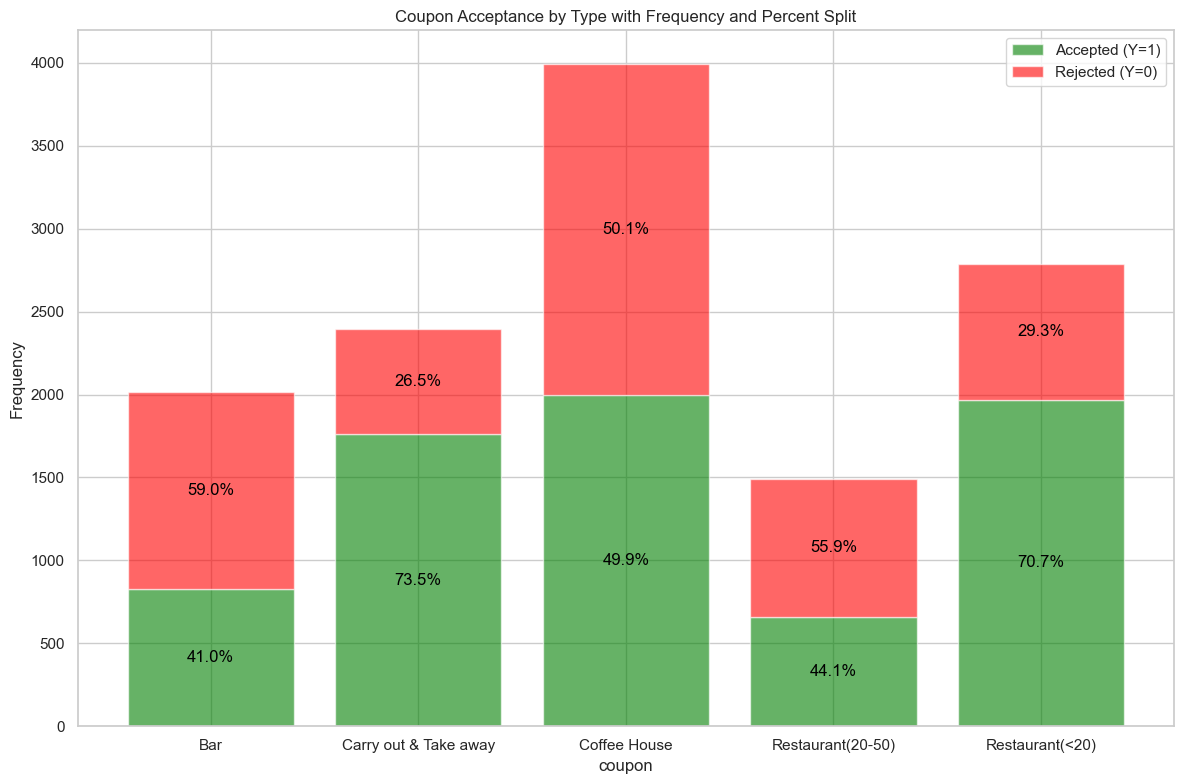
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>


In [39]:

# Analysis by Coupon Type



coupon_image_base64 = create_stacked_bar_plot_multi(['coupon'], 'Coupon Acceptance by Type with Frequency and Percent Split', df_cleaned)



markdown_text = f"""


# Analysis of Coupon Distribution and Acceptance Rates

## Distribution of Coupons

The 'Coffee House' coupons were the most distributed (3,996 instances), indicating a strong emphasis on this category. This was followed by 'Restaurant(<20)', 'Carry out & Take away', 'Bar', and 'Restaurant(20-50)' in decreasing order of frequency.

### Analysis of Acceptance Rates Across Coupon Types

The analysis of coupon acceptance rates across different coupon types reveals distinct trends:

1. **Coffee House Coupon Type**: 
   - **Frequency**: Highest among all coupon types.
   - **Acceptance Rate**:  49.9%. Par
   - **Insight**: Indicates a balanced preference among customers.

2. **Restaurant(<20) / Carry Out & Take Away Coupon Type**: 
   - **Acceptance Rate**: 70.7% Highest, indicating strong customer preference.
   - **Frequency**: Sufficiently high, suggesting good potential for return on investment (ROI).
   - **Insight**: Reflects a preference for affordable dining options and convenience.

3. **Bar Coupon Type**: 
   - **Acceptance Rate**:41% Lower compared to other coupon types.
     - **Frequency**: Second lowest, around 2000.
   - **Insight**: Requires more detailed analysis for better insights, as there is a big divide between drinkers and non drinkers which needs to be factored in and nanalyzed.
4. **Restaurant(20-50) Coupon Type**:
   - **Acceptance Rate**:44.1% Lower compared to other coupon types.
   - **Frequency**: Lowest, under 1500.
   - **Insight**: More anallysis has to be done
   
### Recommendations

- **Prioritize High Acceptance Coupon Types**: Increase distribution in high acceptance coupon types such as 'Restaurant(<20)' and 'Carry Out / Take Away'.
- **Targeted Distribution Strategies**: Implement targeted approaches for other coupon types, focusing on specific customer demographics and preferences.
- **Investigate Low Acceptance Coupon Types**: Conduct in-depth analysis of 'Bar' and 'Restaurant(20-50)' coupon types to identify reasons for low acceptance rates and strategies for improvement.
- **Reevaluate 'Coffee House' Coupon Type Strategy**: Analyze customer segments and preferences specifically for the 'Coffee House' coupon type to optimize the distribution strategy.


<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coupon_image_base64}"  alt="Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>
"""

display(Markdown(markdown_text))






<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                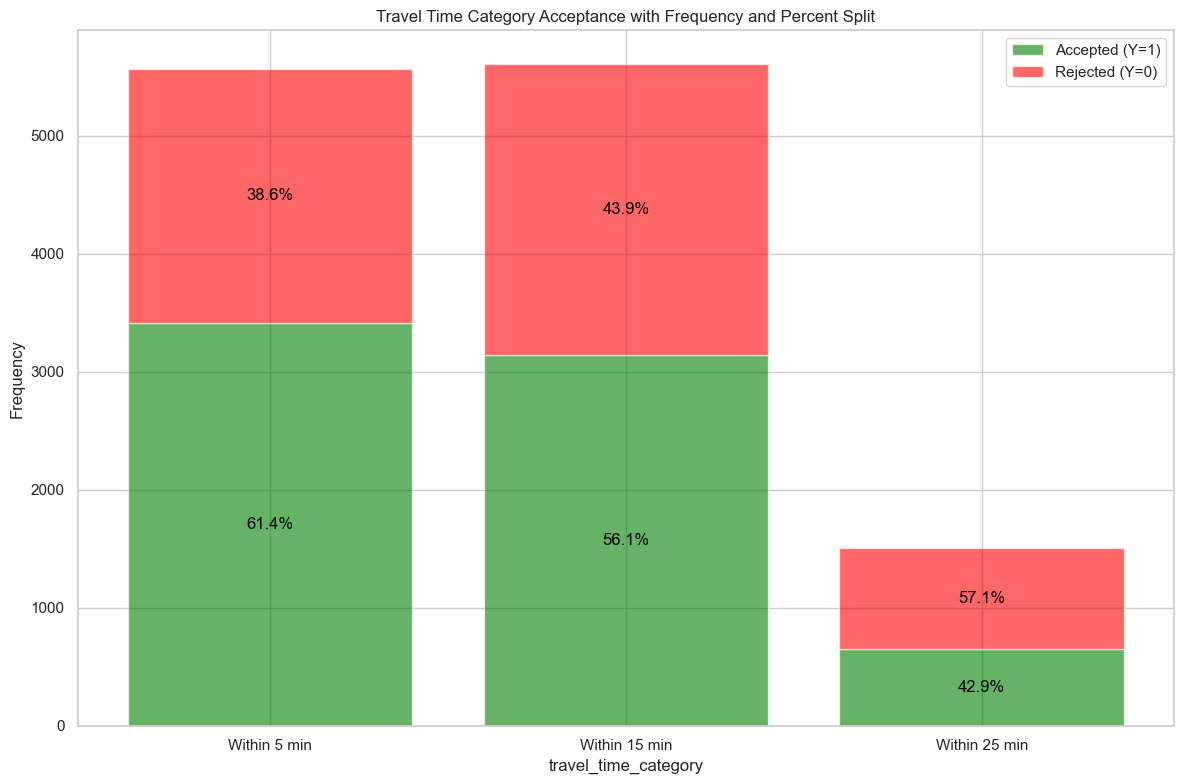
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>



In [11]:
ordering = ['Within 5 min', 'Within 15 min','Within 25 min']
travel_time_image_base64 = create_stacked_bar_plot_multi(['travel_time_category'], 'Travel Time Category Acceptance with Frequency and Percent Split',df_cleaned,0,'linear',ordering)
markdown_text = f"""



<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{travel_time_image_base64}"  alt="Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>

"""

display(Markdown(markdown_text))


<br><br><br><br><br>
# 6. Use a histogram to visualize the temperature column.
<br><br><br><br><br>


## Temperature Distribution
<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                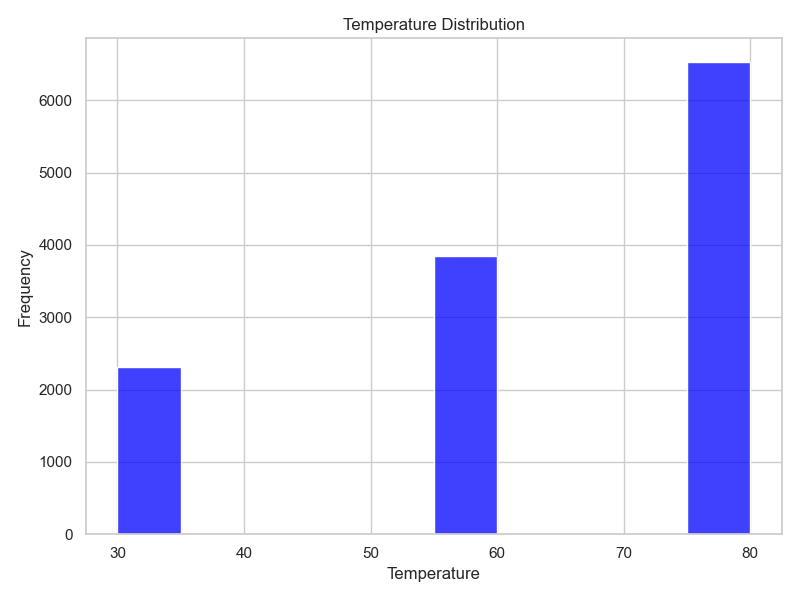
                <em>Figure: Temperature Distribution</em>
            </td>
        </tr>
    </table>
</div>

There are just 3 discrete temperatures:

| Temperature (°F) | Frequency |
| ---------------- | --------- |
| 80              | 6528      |
| 55              | 3840      |
| 30              | 2316      |


- 80°F: Appears 6528 times, indicating more frequent hot weather days.
- 55°F: Appears 3840 times.
- 30°F: Appears 2316 times.

This distribution highlights that hot weather days (80°F) are more prevalent than mild (55°F) and cold days (30°F) in the dataset.
<br><br>



In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['temperature'], bins=10, kde=False, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.tight_layout()
buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
temp_histogram_image64 = base64.b64encode(buffer.getvalue()).decode()



temperature_counts = df_cleaned['temperature'].value_counts()

markdown_text = f"""
## Temperature Distribution
<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{temp_histogram_image64}"  alt="Temperature Distribution" style="width: 100%;"/>
                <em>Figure: Temperature Distribution</em>
            </td>
        </tr>
    </table>
</div>

There are just 3 discrete temperatures:

| Temperature (°F) | Frequency |
| ---------------- | --------- |
| {temperature_counts.index[0]}              | {temperature_counts.values[0]}      |
| {temperature_counts.index[1]}              | {temperature_counts.values[1]}      |
| {temperature_counts.index[2]}              | {temperature_counts.values[2]}      |


- 80°F: Appears 6528 times, indicating more frequent hot weather days.
- 55°F: Appears 3840 times.
- 30°F: Appears 2316 times.

This distribution highlights that hot weather days (80°F) are more prevalent than mild (55°F) and cold days (30°F) in the dataset.
<br><br>

"""

display(Markdown(markdown_text))




<br><br><br><br><br>
# 2. What proportion of bar coupons were accepted?
<br><br><br><br><br>



# Comprehensive Analysis of Bar Coupon Acceptance Patterns 


## Overall Bar Coupon Acceptance Rate
<br>

The proportion of **2017** total bar coupons that chose to accept the coupon is **827** or  **41.00%**.

The acceptance rate is low, and so is the total bar coupon offers sent with respect to the total coupon offers numbering **12684**. <br>
So further analysis defintely needs to be done on bar coupons involving other attributes and factors.
We will be doing this later.
<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                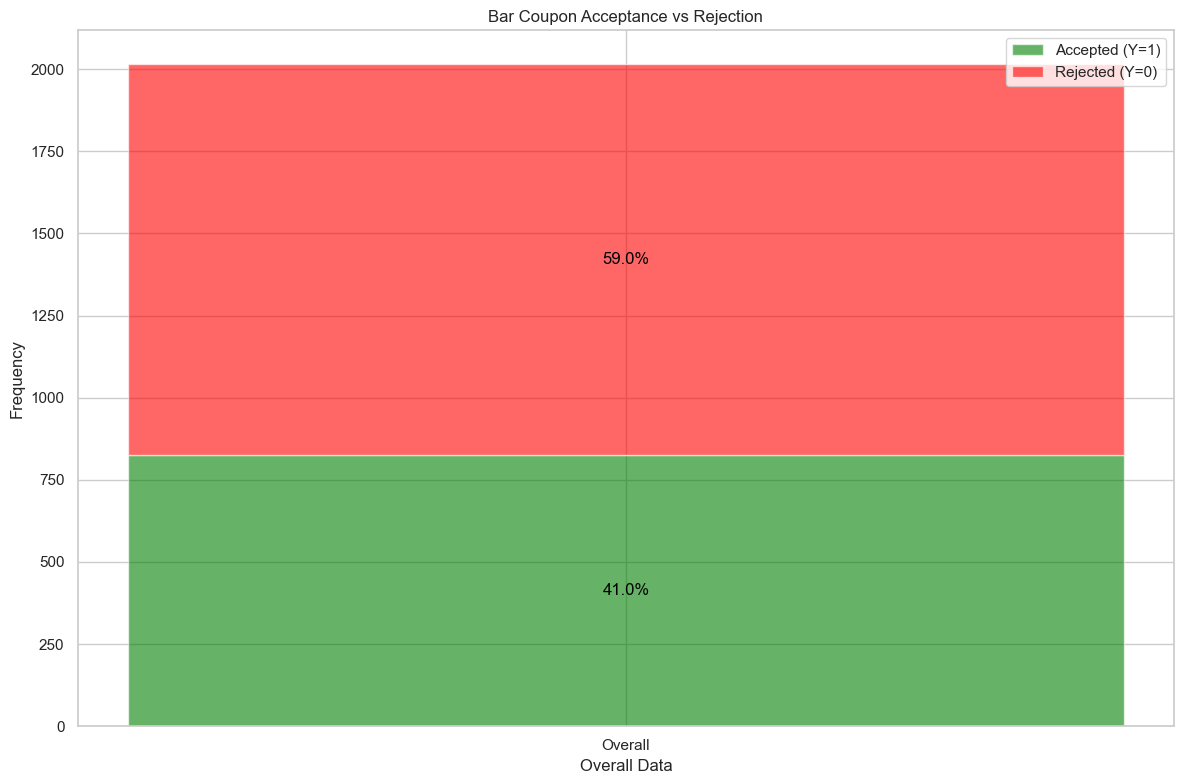
                <em>Figure: Bar Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>






In [13]:
df_bar = df_cleaned.query("coupon == 'Bar'")
total_count = len(df_cleaned)
bar_total_count = len(df_bar)
bar_frequency_count = df_bar['Y'].value_counts()
bar_proportion_data = bar_frequency_count / len(df_bar)


bar_coupon_overall_acceptance_image64 = create_overall_stacked_bar_plot('Bar Coupon Acceptance vs Rejection', df_bar, rotation=0, yscale='linear')



markdown_text = f"""

# Comprehensive Analysis of Bar Coupon Acceptance Patterns 


## Overall Bar Coupon Acceptance Rate
<br>

The proportion of **{bar_total_count}** total bar coupons that chose to accept the coupon is **{bar_frequency_count[1]}** or  **{bar_proportion_data[1]:.2%}**.

The acceptance rate is low, and so is the total bar coupon offers sent with respect to the total coupon offers numbering **{total_count}**. <br>
So further analysis defintely needs to be done on bar coupons involving other attributes and factors.
We will be doing this later.
<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_coupon_overall_acceptance_image64}" alt="Bar Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Bar Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>




"""

display(Markdown(markdown_text))

<br><br><br><br><br><br>
# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
<br><br><br><br><br><br>




# Comprehensive Analysis of Bar Coupon Acceptance Patterns

## Section 1: Acceptance Rate Comparison Based on Bar Visit Frequency

### Overview

Out of a total of **2017** issued:
- **199** were offered to drivers who visited the bar more than 3 times a month, with an acceptance rate of 76.9%.
- **1818** were offered to drivers who visited the bar 3 or fewer times a month, with an acceptance rate of 37.1%.

### Observations and Insights

The data indicates a significant disparity in the distribution of Bar coupons relative to the frequency of visits:
1. **High Acceptance but Low Distribution**: Even though the acceptance rate for drivers visiting the bar more than 3 times a month is high (76.9%), only a small portion of the coupons (199 out of 2017) were offered to this group.
2. **Lower Acceptance with Higher Distribution**: Conversely, the majority of the coupons were offered to those visiting 3 or fewer times a month, a segment with a much lower acceptance rate of 37.1%.

### Recommendations

- **Target Frequent Visitors**: Given the high acceptance rate among frequent bar visitors, it's recommended to increase the distribution of Bar coupons to this group. This could lead to a higher overall acceptance rate and better utilization of the marketing budget.
- **Optimize Coupon Distribution**: Re-evaluate the distribution strategy to align more closely with customer preferences and behaviors, potentially reducing the number of coupons offered to less frequent visitors in favor of targeting those more likely to accept them.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                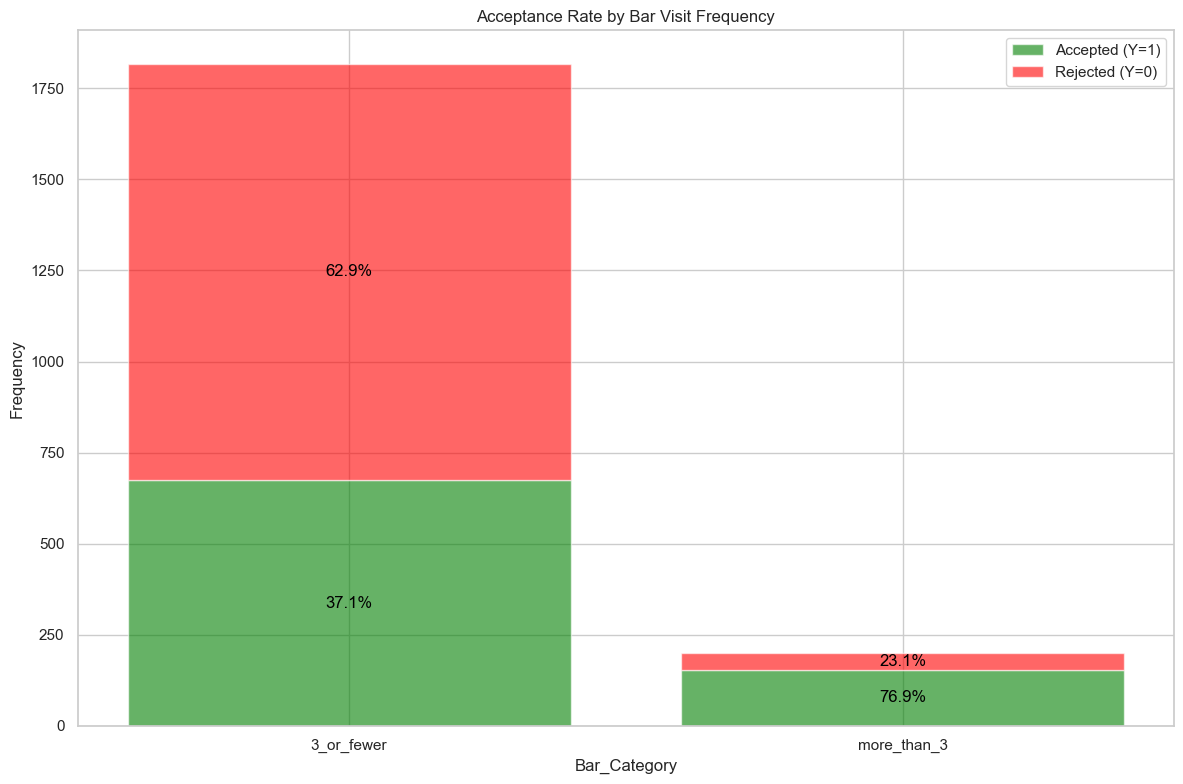
                <em>Figure: Bar Coupon Acceptance Rate by Visit Frequency</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                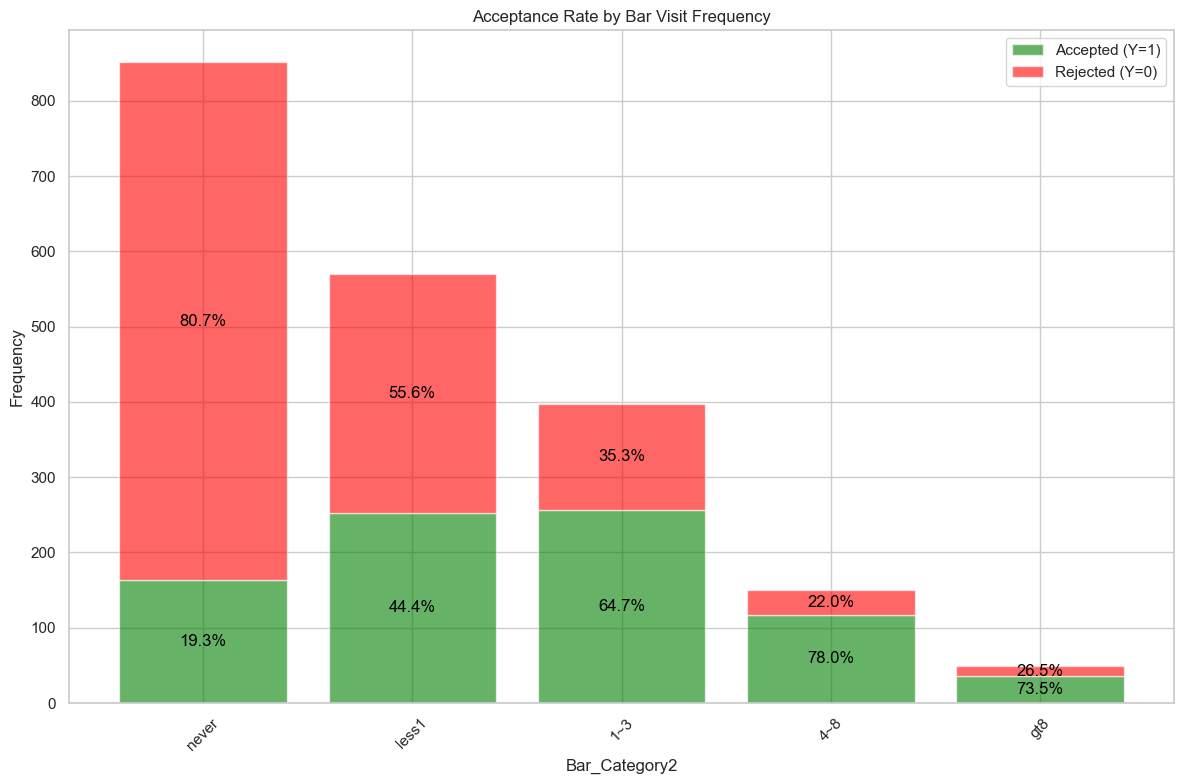
                <em>Figure: Bar Coupon Acceptance Rate by Visit Frequency</em>
            </td>
        </tr>
    </table>
</div>

<br>




In [14]:

def bar_visit_category(visit):
    if visit in ['never', 'less1', '1~3', 'no answer']:
        return '3_or_fewer'
    elif visit in ['4~8', 'gt8']:
        return 'more_than_3'
    
def bar_visit_category_2(visit):
    if visit in ['never','no answer']:
        return 'never'
    else: 
        return visit

df_bar = df_bar.copy()
df_bar['Bar_Category'] = df_bar['Bar'].apply(bar_visit_category)
df_bar['Bar_Category2'] = df_bar['Bar'].apply(bar_visit_category_2)
values = df_bar['Bar_Category'].value_counts()

# Encode the first plot image as a base64 string
bar_3_or_fewer_image64 = create_stacked_bar_plot_multi(['Bar_Category'], 'Acceptance Rate by Bar Visit Frequency',df_bar)
#bar_3_or_fewer_travel_time_image64 = create_stacked_bar_plot_multi(['Bar_Category','travel_time_category'], 'Bar Coupon Acceptance Rate by bar_category and travel_time_category',df_bar,45)
bar_category_image64 = create_stacked_bar_plot_multi(['Bar_Category2'], 'Acceptance Rate by Bar Visit Frequency',df_bar,45,'linear',['never','less1','1~3','4~8', 'gt8'])










markdown_text = f"""

# Comprehensive Analysis of Bar Coupon Acceptance Patterns

## Section 1: Acceptance Rate Comparison Based on Bar Visit Frequency

### Overview

Out of a total of **{bar_total_count}** issued:
- **{values['more_than_3']}** were offered to drivers who visited the bar more than 3 times a month, with an acceptance rate of 76.9%.
- **{values['3_or_fewer']}** were offered to drivers who visited the bar 3 or fewer times a month, with an acceptance rate of 37.1%.

### Observations and Insights

The data indicates a significant disparity in the distribution of Bar coupons relative to the frequency of visits:
1. **High Acceptance but Low Distribution**: Even though the acceptance rate for drivers visiting the bar more than 3 times a month is high (76.9%), only a small portion of the coupons (199 out of 2017) were offered to this group.
2. **Lower Acceptance with Higher Distribution**: Conversely, the majority of the coupons were offered to those visiting 3 or fewer times a month, a segment with a much lower acceptance rate of 37.1%.

### Recommendations

- **Target Frequent Visitors**: Given the high acceptance rate among frequent bar visitors, it's recommended to increase the distribution of Bar coupons to this group. This could lead to a higher overall acceptance rate and better utilization of the marketing budget.
- **Optimize Coupon Distribution**: Re-evaluate the distribution strategy to align more closely with customer preferences and behaviors, potentially reducing the number of coupons offered to less frequent visitors in favor of targeting those more likely to accept them.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_3_or_fewer_image64}" alt="Bar Coupon Acceptance Rate by Visit Frequency" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Visit Frequency</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_category_image64}" alt="Bar Coupon Acceptance Rate by Visit Frequency" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Visit Frequency</em>
            </td>
        </tr>
    </table>
</div>

<br>


"""

display(Markdown(markdown_text))


In [15]:
df_bar['age'].value_counts()

21-25      417
26-30      395
31-35      339
50plus     283
36-40      209
41-45      178
46-50      109
below21     87
Name: age, dtype: int64

# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?



# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

## Section 2: Acceptance Rate Among Frequent Bar Visitors Aged Over 25

### Overview

Out of a total of **2017** issued:
- **420** were offered to drivers older than 25 who visited the bar more than once a month, with an acceptance rate of 69.5%.
- **1597** were offered to other drivers, with an acceptance rate of 33.5%.

### Observations and Insights

The data reveals a notable distinction in Bar coupon acceptance rates based on age and frequency of visits:
1. **Targeted Demographic with Higher Acceptance Rate**: Drivers older than 25 who frequented the bar more than once a month showed a higher acceptance rate of 69.5%, but only 420 out of the 2017 coupons were distributed to them.
2. **Lower Acceptance in Other Groups**: A majority of the coupons (1597 out of 2017) was offered to other drivers, exhibiting a lower acceptance rate of 33.5%.

### Recommendations

- **Prioritize Older, Frequent Bar Visitors**: Increase the distribution of Bar coupons to drivers over the age of 25 who are regular bar visitors to capitalize on the higher acceptance rate in this group.
- **Refine Distribution Approach**: Reassess the coupon distribution strategy to better match the observed customer behaviors and preferences, focusing on those more likely to accept the coupons.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                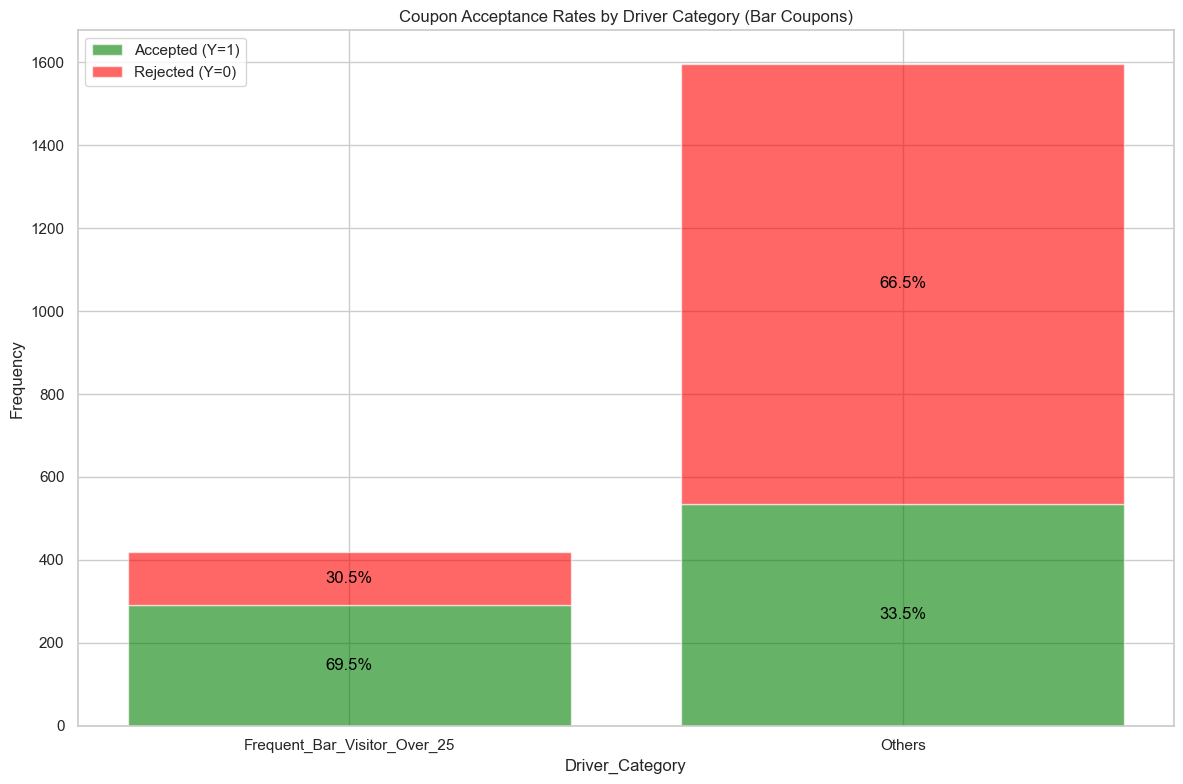
                <em>Figure: Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25</em>
            </td>
        </tr>
         <tr>
            <td style="text-align: center;">
                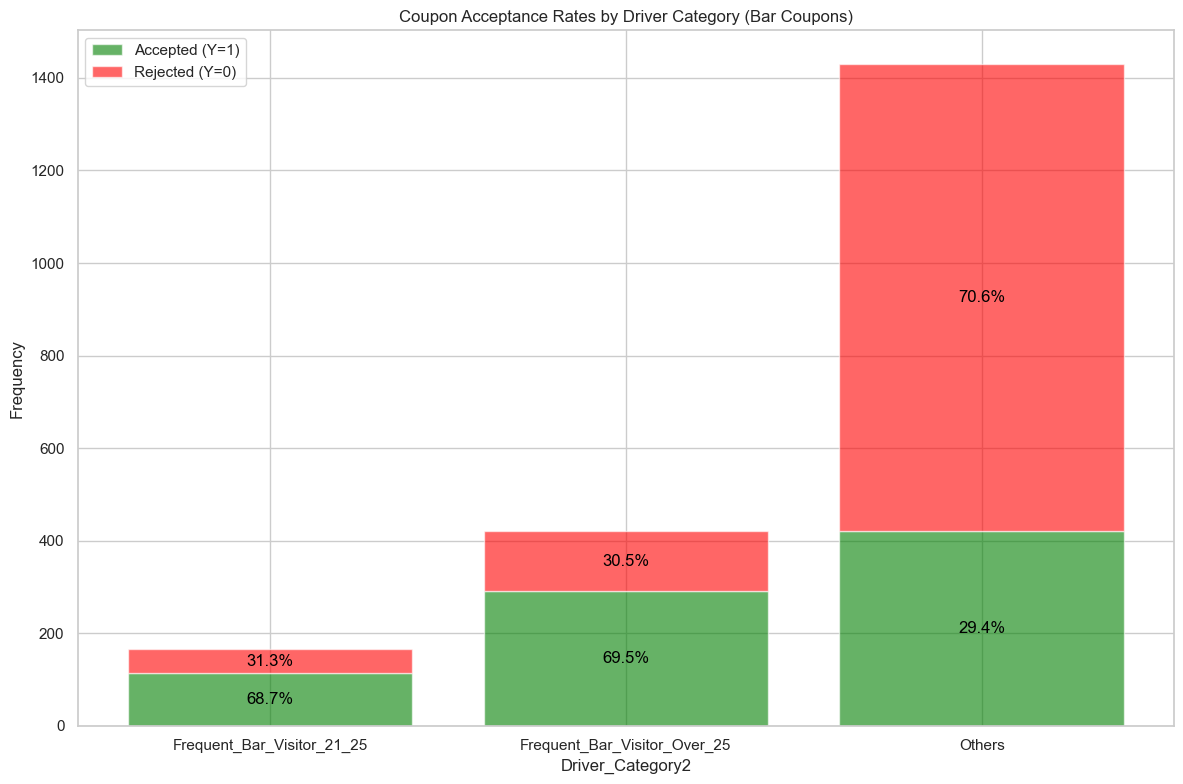
                <em>Figure: Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                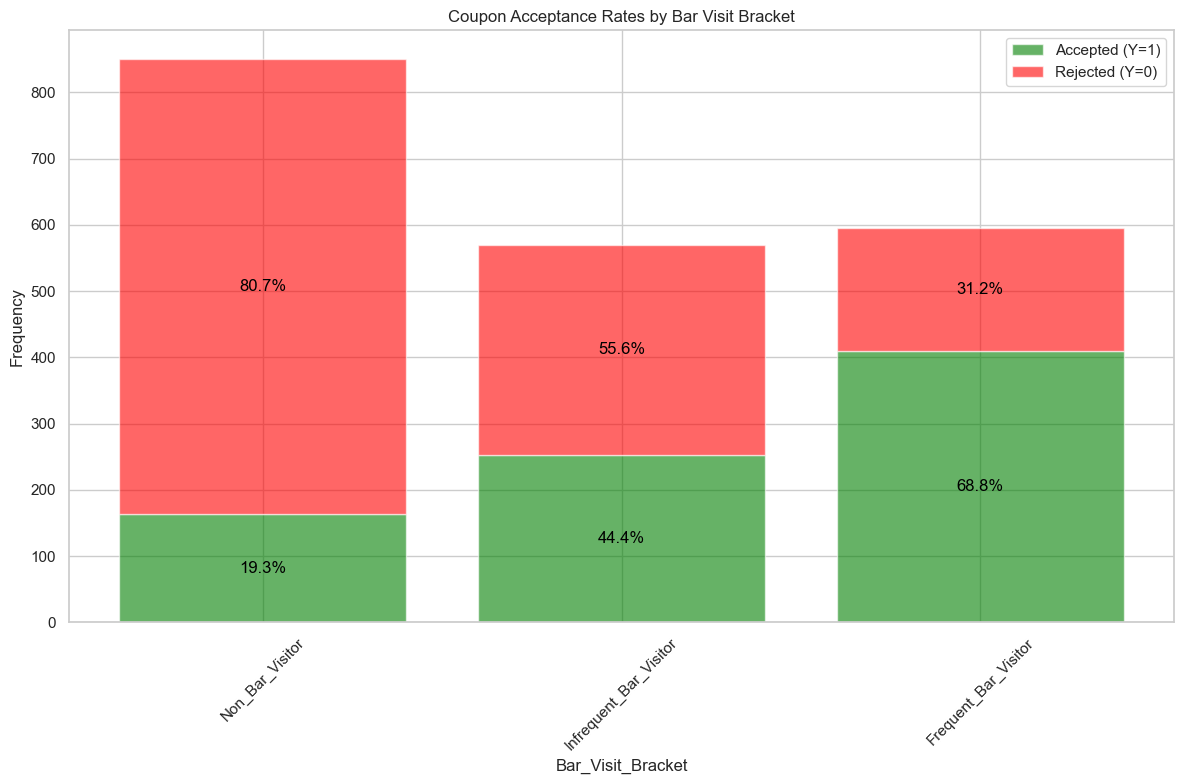
                <em>Figure: Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25</em>
            </td>
        </tr>
    </table>
</div>

<br>


## Section 3: Acceptance Rate by Age Group

### Insights

Intrigued by the results from the previous sections, a further analysis was conducted to understand the acceptance rates by specific age groups:
1. **Unexpected Acceptance Among Under-21 Drivers**: Despite being below the legal drinking age in many regions, drivers under the age of 21 show an acceptance rate of 40% for bar coupons. Though the count here is only **10**, the ethics and legality of targeting this group with bar-related offers are questionable.
2. **Highest Acceptance Among Ages 26-30**: The age group 26-30 shows the highest acceptance rate at 77.51%, indicating a strong interest in bar coupons.
3. **Variable Acceptance Across Other Age Groups**: Other age groups show varied acceptance rates, with ages 21 and 46-50 also demonstrating higher acceptance rates of 68.67% and 75.00%, respectively.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                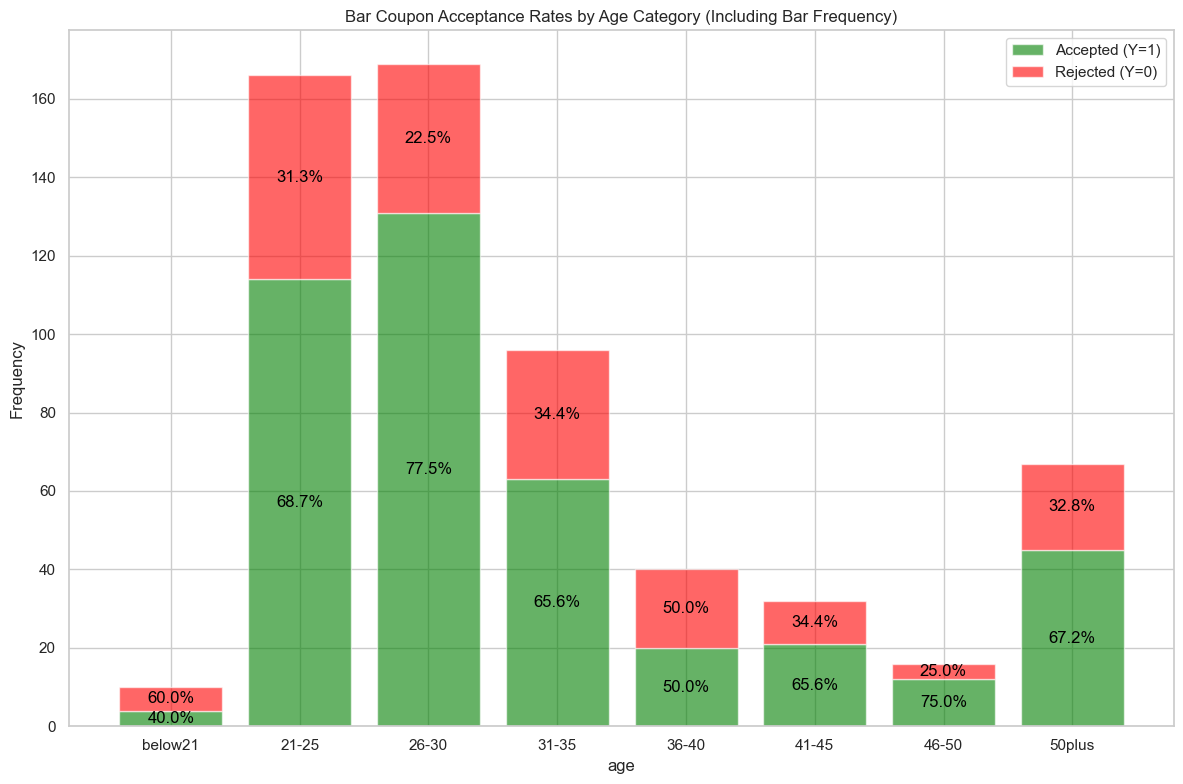
                <em>Figure: Bar Coupon Acceptance Rate by Age Group</em>
            </td>
        </tr>
    </table>
</div>

### Recommendations

- **Target the 40+ Age Group More Aggressively**: Given the higher acceptance rates observed in the age groups 40 and above, it is advisable to increase the distribution of Bar coupons to this demographic. This strategy could capitalize on the potential interest within this age group, potentially leading to a higher overall acceptance rate.
- **Reevaluate Marketing Strategies for Younger Demographics**: The lower acceptance rates among younger age groups, particularly those under 21, should prompt a reassessment of how Bar coupons are marketed to these segments. This includes considering the ethical and legal implications of targeting under-21 drivers with bar-related promotions.



In [16]:
def categorize_driver(row):
    # Condition for the specific group
    if row['Bar'] not in ['never', 'less1', 'no answer'] and row['age'] not in ['below21','21-25']:
        return 'Frequent_Bar_Visitor_Over_25'
    else:
        return 'Others'

def categorize_driver1(row):
    # Condition for the specific group
    if row['Bar']  in ['never',  'no answer']:
        return 'Non_Bar_Visitor'
    elif row['Bar'] =='less1':
         return 'Infrequent_Bar_Visitor'
    else:
        return 'Frequent_Bar_Visitor'
    
def categorize_driver2(row):
    # Condition for the specific group
    if row['Bar'] not in ['never', 'less1', 'no answer'] and row['age'] not in ['below21','21-25']:
        return 'Frequent_Bar_Visitor_Over_25'
    elif row['Bar'] not in ['never', 'less1', 'no answer'] and row['age'] == '21-25':
        return 'Frequent_Bar_Visitor_21_25'
    else:
        return 'Others'
    
# Applying the function to create a new category
df_bar1 = df_bar.copy()
df_bar1['Driver_Category'] = df_bar1.apply(categorize_driver, axis=1)
df_bar1['Driver_Category2'] = df_bar1.apply(categorize_driver2, axis=1)
df_bar1['Bar_Visit_Bracket'] = df_bar1.apply(categorize_driver1, axis=1)
drv_cat_values =df_bar1['Driver_Category'].value_counts()

bar_above_25_2_image64 = create_stacked_bar_plot_multi(['Driver_Category'], "Coupon Acceptance Rates by Driver Category (Bar Coupons)",df_bar1)
bar_category2_image64 = create_stacked_bar_plot_multi(['Driver_Category2'], "Coupon Acceptance Rates by Driver Category (Bar Coupons)",df_bar1)

bar_visit_image64 =  create_stacked_bar_plot_multi(['Bar_Visit_Bracket'], "Coupon Acceptance Rates by Bar Visit Bracket",df_bar1,45,'linear',['Non_Bar_Visitor','Infrequent_Bar_Visitor','Frequent_Bar_Visitor'])



df_bar_age=df_cleaned.query("coupon == 'Bar' and Bar not in ['never', 'less1', 'no answer'] ").copy()

# df_bar1['Driver_Category1'] = df_bar1.apply(categorize_driver1, axis=1)
# df_bar_age=df_bar1.query("Driver_Category1 == 'Frequent_Bar_Visitor'")

# Applying the updated categorization function

age_cat_values=df_bar_age['age'] .value_counts()
ordering = ['below21','21-25','26-30','31-35','36-40','41-45','46-50','50plus']

# Encode the first plot image as a base64 string
bar_acceptance_by_age_image64 =  create_stacked_bar_plot_multi(['age'], "Bar Coupon Acceptance Rates by Age Category (Including Bar Frequency)",df_bar_age,0,'linear',ordering)






markdown_text = f"""
# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

## Section 2: Acceptance Rate Among Frequent Bar Visitors Aged Over 25

### Overview

Out of a total of **{bar_total_count}** issued:
- **{drv_cat_values['Frequent_Bar_Visitor_Over_25']}** were offered to drivers older than 25 who visited the bar more than once a month, with an acceptance rate of 69.5%.
- **{drv_cat_values['Others']}** were offered to other drivers, with an acceptance rate of 33.5%.

### Observations and Insights

The data reveals a notable distinction in Bar coupon acceptance rates based on age and frequency of visits:
1. **Targeted Demographic with Higher Acceptance Rate**: Drivers older than 25 who frequented the bar more than once a month showed a higher acceptance rate of 69.5%, but only 420 out of the 2017 coupons were distributed to them.
2. **Lower Acceptance in Other Groups**: A majority of the coupons (1597 out of 2017) was offered to other drivers, exhibiting a lower acceptance rate of 33.5%.

### Recommendations

- **Prioritize Older, Frequent Bar Visitors**: Increase the distribution of Bar coupons to drivers over the age of 25 who are regular bar visitors to capitalize on the higher acceptance rate in this group.
- **Refine Distribution Approach**: Reassess the coupon distribution strategy to better match the observed customer behaviors and preferences, focusing on those more likely to accept the coupons.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_above_25_2_image64}" alt="Bar Coupon Acceptance Rate by Driver Category" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25</em>
            </td>
        </tr>
         <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_category2_image64}" alt="Bar Coupon Acceptance Rate by Driver Category" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_visit_image64}" alt="Bar Coupon Acceptance Rate by Driver Category" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate Among Frequent Bar Visitors Aged Over 25</em>
            </td>
        </tr>
    </table>
</div>

<br>


## Section 3: Acceptance Rate by Age Group

### Insights

Intrigued by the results from the previous sections, a further analysis was conducted to understand the acceptance rates by specific age groups:
1. **Unexpected Acceptance Among Under-21 Drivers**: Despite being below the legal drinking age in many regions, drivers under the age of 21 show an acceptance rate of 40% for bar coupons. Though the count here is only **{age_cat_values['below21']}**, the ethics and legality of targeting this group with bar-related offers are questionable.
2. **Highest Acceptance Among Ages 26-30**: The age group 26-30 shows the highest acceptance rate at 77.51%, indicating a strong interest in bar coupons.
3. **Variable Acceptance Across Other Age Groups**: Other age groups show varied acceptance rates, with ages 21 and 46-50 also demonstrating higher acceptance rates of 68.67% and 75.00%, respectively.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{bar_acceptance_by_age_image64}" alt="Bar Coupon Acceptance Rate by Age Group" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Age Group</em>
            </td>
        </tr>
    </table>
</div>

### Recommendations

- **Target the 40+ Age Group More Aggressively**: Given the higher acceptance rates observed in the age groups 40 and above, it is advisable to increase the distribution of Bar coupons to this demographic. This strategy could capitalize on the potential interest within this age group, potentially leading to a higher overall acceptance rate.
- **Reevaluate Marketing Strategies for Younger Demographics**: The lower acceptance rates among younger age groups, particularly those under 21, should prompt a reassessment of how Bar coupons are marketed to these segments. This includes considering the ethical and legal implications of targeting under-21 drivers with bar-related promotions.

"""

display(Markdown(markdown_text))



<br><br><br><br><br>
# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
<br><br><br><br><br>


# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

## Section 4: Acceptance Rate Among Frequent Bar Visitors With No Kids who are not Farmers

### Overview

The analysis focused on two driver categories based on their bar visit frequency, occupation, and passenger type. The categories are 'Non_Farmer_No_Kids_Freq_Bar' (drivers who visit bars more than once a month, are not in farming, fishing, or forestry occupations, and don't have kids as passengers) and 'Others'.

Out of a total of 2017 issued:
- 551 were offered to non-farmer drivers without kids who visited the bar more than once a month, with an acceptance rate of 71.3%.
- 1466 were offered to other drivers, with an acceptance rate of 29.6%.

### Observations and Insights

1. **High Acceptance Among Non-Farmer Drivers Without Kids**: The acceptance rate for the 'Non_Farmer_No_Kids_Freq_Bar' category is notably high at 71.3%, indicating a strong interest in bar coupons among this group. This suggests that frequent bar visitors who are not in certain occupations and don't travel with kids are more likely to accept bar coupons.
2. **Varied Acceptance Among Other Drivers**: The 'Others' category, encompassing all other drivers, showed a different level of acceptance at 29.6%. This group includes a diverse range of drivers, hence the acceptance rate might be influenced by various factors like age, occupation, and passenger type.

### Recommendations

- **Increase Focus on Non-Farmer Drivers Without Kids**: Given the high acceptance rate in the 'Non_Farmer_No_Kids_Freq_Bar' category, it is recommended to target this demographic more intensely with bar coupon distributions. Tailoring promotions to meet the interests and lifestyles of this group could yield higher coupon acceptance rates.
- **Diversify Strategy for Other Driver Categories**: For the 'Others' category, a more diverse and segmented marketing approach may be beneficial. Analyzing subgroups within this category based on factors like age, occupation, and whether they travel with kids can help tailor the coupon offers to better suit their preferences and increase acceptance rates.

<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                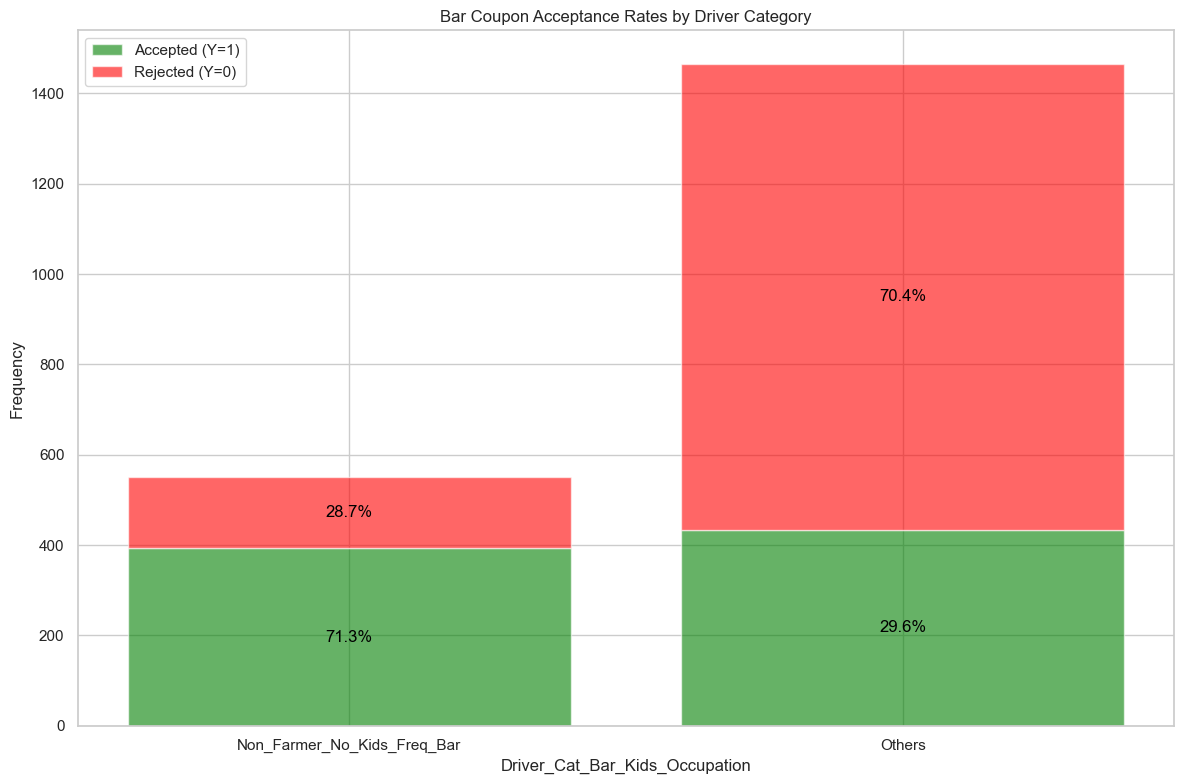
                <em>Figure: Bar Coupon Acceptance Rate by Driver Category</em>
            </td>
        </tr>
    </table>
</div>
<br>



Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [56]:
# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
# Defining the function to categorize drivers
def cat_driver_by_occupation_kids(row):
    # Condition for the specific group
    if (row['Bar'] not in ['never', 'less1', 'no answer'] and 
            row['occupation'] != 'Farming Fishing & Forestry' and 
            row['passenger'] != 'Kid(s)'):
        return 'Non_Farmer_No_Kids_Freq_Bar'
    
    else:
        return 'Others'

    
    
# Applying the function to create a new category
df_bar2 = df_bar.query("coupon == 'Bar'").copy()
df_bar2['Driver_Cat_Bar_Kids_Occupation'] = df_bar2.apply(cat_driver_by_occupation_kids, axis=1)



# Encode the first plot image as a base64 string
Non_Farmer_No_Kids_Freq_Bar1_image64 = create_stacked_bar_plot_multi(['Driver_Cat_Bar_Kids_Occupation'], "Bar Coupon Acceptance Rates by Driver Category",df_bar2)






from IPython.display import Markdown

# Generating the markdown text for the report
markdown_text = f"""
# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

## Section 4: Acceptance Rate Among Frequent Bar Visitors With No Kids who are not Farmers

### Overview

The analysis focused on two driver categories based on their bar visit frequency, occupation, and passenger type. The categories are 'Non_Farmer_No_Kids_Freq_Bar' (drivers who visit bars more than once a month, are not in farming, fishing, or forestry occupations, and don't have kids as passengers) and 'Others'.

Out of a total of 2017 issued:
- 551 were offered to non-farmer drivers without kids who visited the bar more than once a month, with an acceptance rate of 71.3%.
- 1466 were offered to other drivers, with an acceptance rate of 29.6%.

### Observations and Insights

1. **High Acceptance Among Non-Farmer Drivers Without Kids**: The acceptance rate for the 'Non_Farmer_No_Kids_Freq_Bar' category is notably high at 71.3%, indicating a strong interest in bar coupons among this group. This suggests that frequent bar visitors who are not in certain occupations and don't travel with kids are more likely to accept bar coupons.
2. **Varied Acceptance Among Other Drivers**: The 'Others' category, encompassing all other drivers, showed a different level of acceptance at 29.6%. This group includes a diverse range of drivers, hence the acceptance rate might be influenced by various factors like age, occupation, and passenger type.

**Note**: the results above might be deceiving and a red herring.We noticed that there are only 43 farmers in the whole dataset and only 9 who were offered bar coupons, so we decided to do more analysis (in the next section.



<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Non_Farmer_No_Kids_Freq_Bar1_image64}"  alt="Bar Coupon Acceptance Rate by Driver Category" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rate by Driver Category</em>
            </td>
        </tr>
    </table>
</div>
<br>

"""

# Displaying the markdown report
display(Markdown(markdown_text))

df_cleaned['occupation'].value_counts()

9        False
13       False
17       False
24       False
35       False
         ...  
12663    False
12664    False
12667    False
12670    False
12682    False
Length: 2017, dtype: bool


# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

the hypothesis was that the filter with occupation = Farming Fishing & Forestry was a red herring, false flag and had no bearing on the results
Kids as passengers vs No Kids as passengers may or may not affect the results.. but whether the driver visited bars or not defintely mattered
so we created 6 filters and the following groups
'group1': 'Non Farmer, No Kids',
    'group2': 'Farmer, No Kids',
    'group3': 'Bar Visiting Farmer',
    'group4': 'All Farmers w Bar Coupons',
    'group5': 'Bar Visiting No Kids',
    'group6': 'Bar Visiting w Kids'
    
    and used our same stack bar graphs showing frequency and acceptance rates. the results were exactly what we were anticipating.
  
  | Group Description | Acceptance Rate | Frequency |
|-------------------|-----------------|-----------|
| Non Farmer, No Kids | 71.32% | 551 |
| Farmer, No Kids | nan% | 0 |
| Bar Visiting Farmer | nan% | 0 |
| All Farmers w Bar Coupons | 44.44% | 9 |
| Bar Visiting No Kids | 71.32% | 551 |
| Bar Visiting w Kids | 37.78% | 45 |

  
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                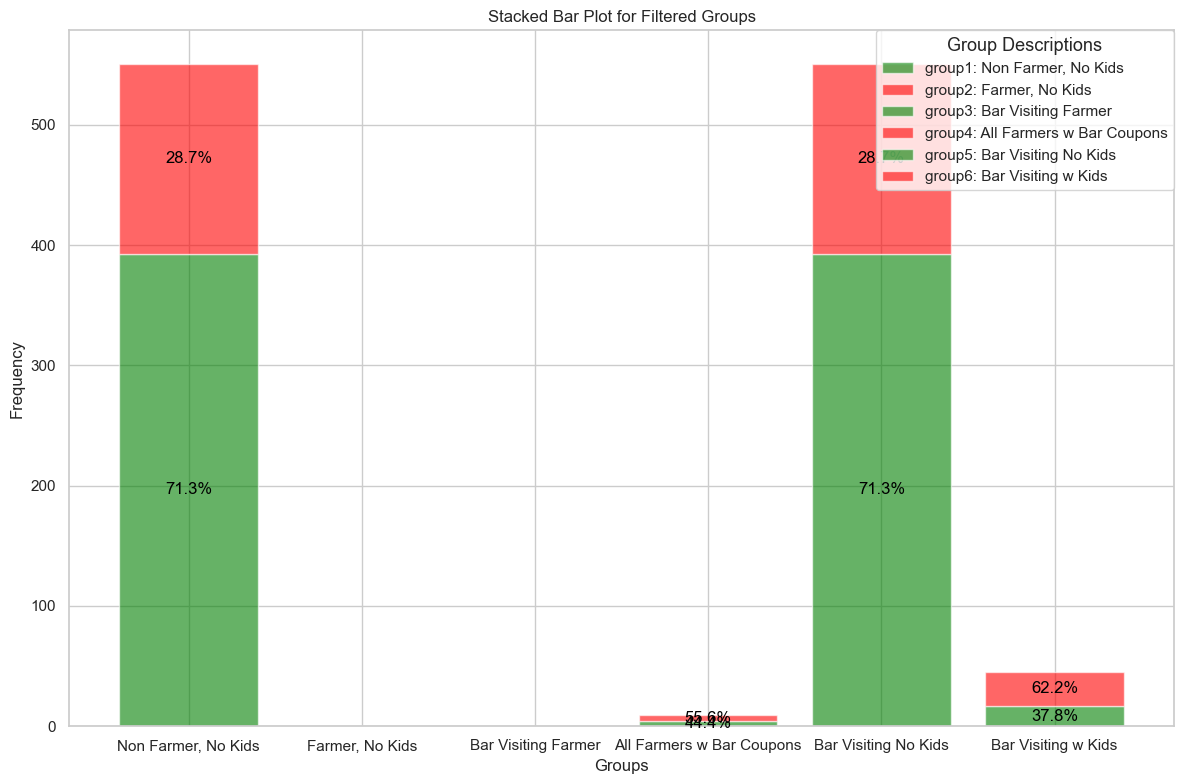
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

<br><br>


({'group1': {'rate': 0.7132486388384754, 'frequency': 551},
  'group2': {'rate': nan, 'frequency': 0},
  'group3': {'rate': nan, 'frequency': 0},
  'group4': {'rate': 0.4444444444444444, 'frequency': 9},
  'group5': {'rate': 0.7132486388384754, 'frequency': 551},
  'group6': {'rate': 0.37777777777777777, 'frequency': 45}},
 {'group1': 'Non Farmer, No Kids',
  'group2': 'Farmer, No Kids',
  'group3': 'Bar Visiting Farmer',
  'group4': 'All Farmers w Bar Coupons',
  'group5': 'Bar Visiting No Kids',
  'group6': 'Bar Visiting w Kids'})

In [65]:
filter_list = {
    "group1": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['passenger'] != 'Kid(s)') & (df_bar['occupation'] != 'Farming Fishing & Forestry'),
    "group2": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['passenger'] != 'Kid(s)') & (df_bar['occupation'] == 'Farming Fishing & Forestry'),
    "group3": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['occupation'] == 'Farming Fishing & Forestry'),
    "group4": (df_bar['occupation'] == 'Farming Fishing & Forestry'),
    "group5": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['passenger'] != 'Kid(s)'),
    "group6": (~df_bar['Bar'].isin(['never', 'less1', 'no answer'])) & (df_bar['passenger'] == 'Kid(s)')
}
filters = [condition for condition in filter_list.values()]

# Dictionary to store acceptance rates and frequency counts
acceptance_rates = {}

# Calculating acceptance rates and frequency for each filter
for group_name, filter_condition in filter_list.items():
    filtered_df = df_bar[filter_condition]
    acceptance_rate = filtered_df['Y'].mean()  # Calculate the mean of 'Y' column
    frequency = len(filtered_df)  # Count the number of rows in the filtered DataFrame
    acceptance_rates[group_name] = {'rate': acceptance_rate, 'frequency': frequency}



group_descriptions = {
    'group1': 'Non Farmer, No Kids',
    'group2': 'Farmer, No Kids',
    'group3': 'Bar Visiting Farmer',
    'group4': 'All Farmers w Bar Coupons',
    'group5': 'Bar Visiting No Kids',
    'group6': 'Bar Visiting w Kids'
    
}





filter_labels = [label for label in group_descriptions.values()]
# filter_labels = ['Non Farmer, No Kids', 'Farmer, No Kids','Bar Visiting Farmer','All Farmers w Bar Coupons','Bar Visiting No Kids','Bar Visiting w Kids']
plot_title = 'Stacked Bar Plot for Filtered Groups'

# Correcting the variable name
Farmer_NonFarmer_image64 = create_stacked_bar_plot_with_filters(filters, filter_labels, plot_title, group_descriptions, df_bar, rotation=0, yscale='linear')

# Script to convert the DataFrame to a Markdown table
# Generating a markdown table dynamically from acceptance_rates and group_descriptions

# Creating the markdown table

markdown_table = "| Group Description | Acceptance Rate | Frequency |\n|-------------------|-----------------|-----------|\n"
for group_id, group_data in acceptance_rates.items():
    description = group_descriptions[group_id]  # Retrieve description
    rate = group_data['rate']
    formatted_rate = "{:.2%}".format(rate) if rate is not None and not math.isnan(rate) else "N/A"
    frequency = group_data['frequency']  # Retrieve frequency
    markdown_table += f"| {description} | {formatted_rate} | {frequency} |\n"





markdown_text = f"""
# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

the hypothesis was that the filter with occupation = Farming Fishing & Forestry was a red herring, false flag and had no bearing on the results
Kids as passengers vs No Kids as passengers may or may not affect the results.. but whether the driver visited bars or not defintely mattered
so we created 6 filters and the following groups
'group1': 'Non Farmer, No Kids',
    'group2': 'Farmer, No Kids',
    'group3': 'Bar Visiting Farmer',
    'group4': 'All Farmers w Bar Coupons',
    'group5': 'Bar Visiting No Kids',
    'group6': 'Bar Visiting w Kids'
    
    and used our same stack bar graphs showing frequency and acceptance rates. the results were exactly what we were anticipating.
  
  {markdown_table}
  
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Farmer_NonFarmer_image64}" alt="Bar Coupon Acceptance Rates By Lifestyle and Demographics" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

<br><br>
"""

display(Markdown(markdown_text))
acceptance_rates, group_descriptions

In [69]:
df_bar['occupation'].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

<br><br><br><br><br><br>
# 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [70]:



 df_cleaned['age'].value_counts()

21-25      2653
26-30      2559
31-35      2039
50plus     1788
36-40      1319
41-45      1093
46-50       686
below21     547
Name: age, dtype: int64


# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

## Section 5: Acceptance Rate Analysis Based on Lifestyle and Demographic Factors

### Overview

This report analyzes the acceptance rates of bar coupons among drivers in a dataset, focusing on the influence of lifestyle and demographic factors such as going to bars, age, presence of kids as passengers, frequenting cheap restaurants, and income level.

<br><br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                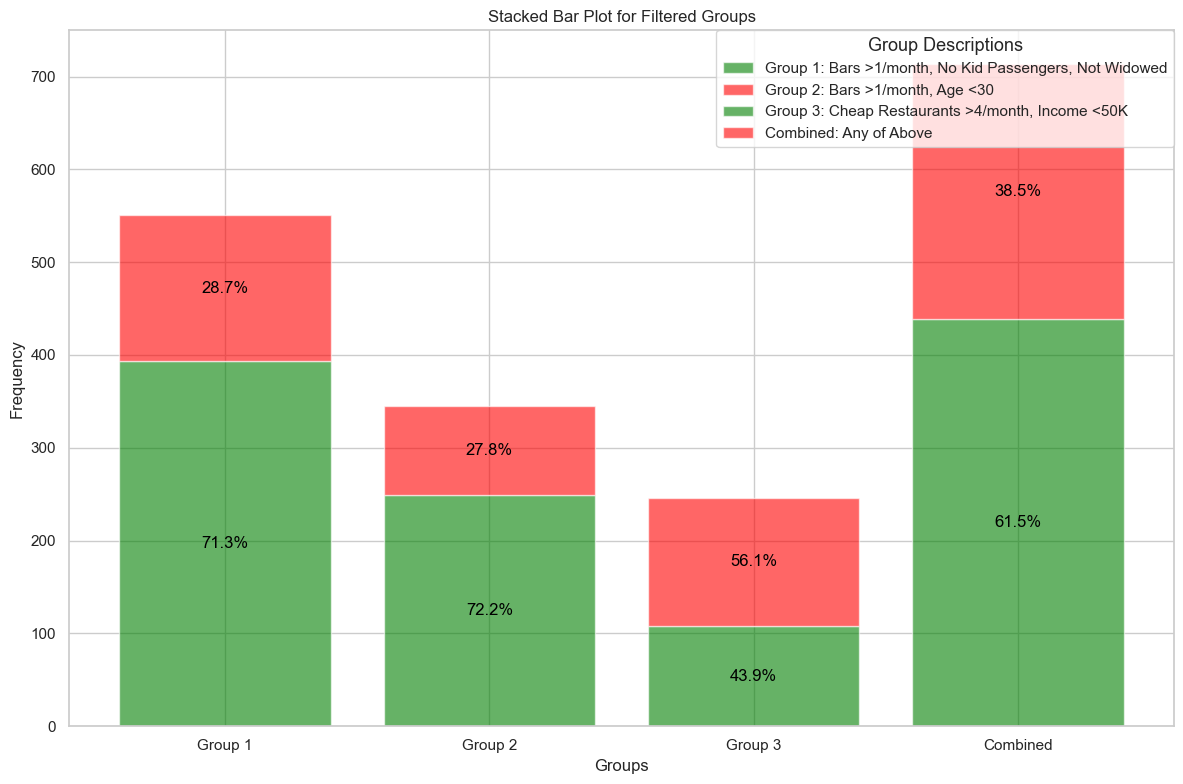
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
         <tr>
            <td style="text-align: center;">
                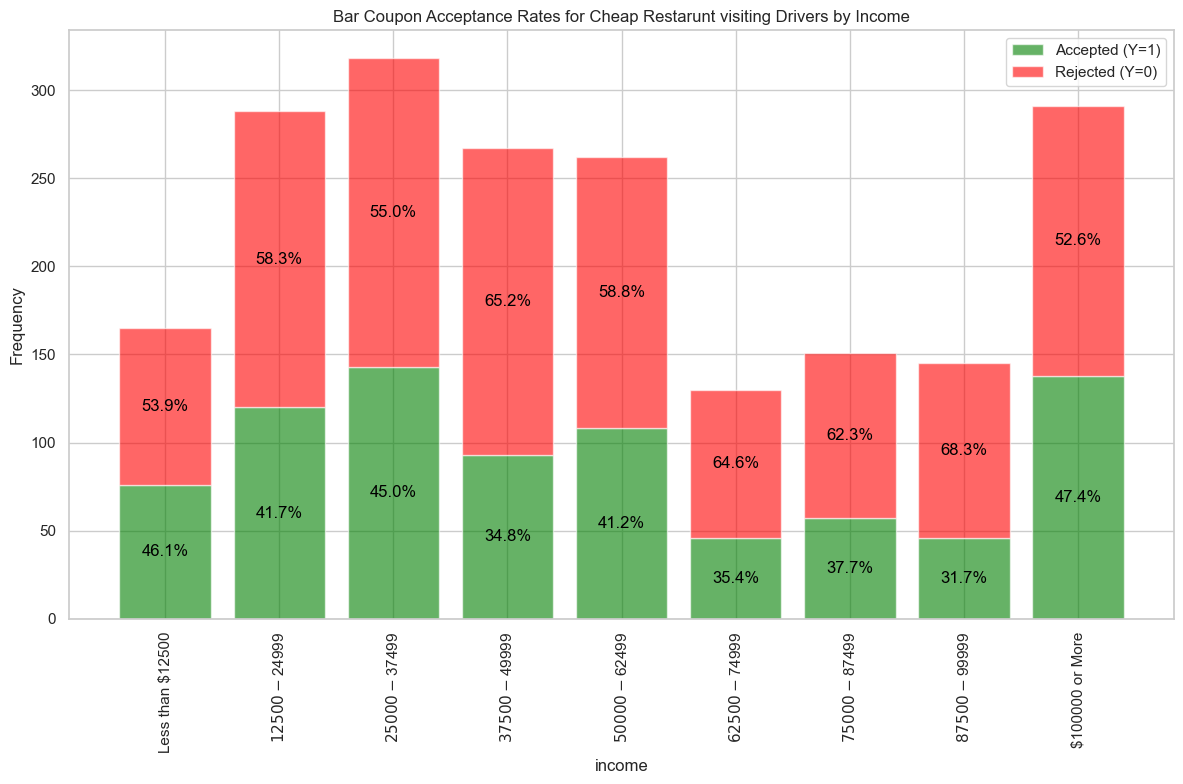
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

<br><br>

## Methodology

Three distinct groups of drivers were analyzed based on the following criteria:
1. **Group 1**: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed.
2. **Group 2**: Drivers who go to bars more than once a month and are under the age of 30.
3. **Group 3**: Drivers who go to cheap restaurants more than 4 times a month and have an income of less than $50K.

Acceptance rates for each group were calculated to understand the impact of these factors.

## Findings

### Distribution and Acceptance Rates

| Group    | Count | Acceptance Rate |
|----------|-------|-----------------|
| Group 1  | 11548 | 57.50%          |
| Group 2  | 5759  | 60.06%          |
| Group 3  | 2865  | 58.29%          |
| Combined | 11927 | 57.52%          |

### Analysis

The analysis reveals that the acceptance rates across different groups are relatively uniform, ranging between 57.50% and 60.06%. This consistency suggests that while there are slight variations in acceptance rates based on lifestyle and demographic factors, these differences are not drastic.

### Conclusions

- The similar acceptance rates across all groups indicate that bar coupons are generally well-received among the various segments of drivers analyzed. This uniformity suggests a broad appeal of these offers across different lifestyles and demographics.
- Despite the higher distribution in some groups, the acceptance rates do not vary significantly. This implies that the current distribution strategy is relatively effective across different segments.

### Recommendations

- **Maintain Diverse Targeting Approach**: Given the similar acceptance rates across the groups, it is recommended to continue with a diverse targeting strategy, catering to a broad range of drivers.
- **Monitor and Adjust as Needed**: While the current distribution strategy seems effective, it is important to continuously monitor the acceptance rates and adjust the strategy if significant changes are observed in the future.
- **Explore Further Segmentation**: Although the current analysis shows uniform acceptance rates, exploring further segmentation of these groups could reveal more nuanced insights, potentially leading to more targeted and efficient marketing strategies.




In [77]:

income_categories_under_50k = ["$25000 - $37499", "$12500 - $24999", "Less than $12500"]

# Creating filters for the specified groups
# group1_filter = (~df_cleaned['Bar'].isin(['never', 'less1', 'no answer'])) & (df_cleaned['passenger'] != 'Kid(s)') & (df_cleaned['maritalStatus'] != 'Widowed')

# group2_filter = (~df_cleaned['Bar'].isin(['never', 'less1', 'no answer']) ) & (df_cleaned['age'] < 30)
# group3_filter = (df_cleaned['coupon'] == 'Bar') & (df_cleaned['RestaurantLessThan20'] > '4') & (df_cleaned['income'].isin(income_categories_under_50k))

query1_string = "(coupon == 'Bar') and (Bar not in ['never', 'less1', 'no answer']) and (passenger != 'Kid(s)') and (maritalStatus != 'Widowed')"
group1_filter = df_cleaned.eval(query1_string)

query2_string = "(coupon == 'Bar') and (Bar not in ['never', 'less1', 'no answer']) and (age in ['below21','21-25','26-30']) "
group2_filter = df_cleaned.eval(query2_string)

query3_string = "(coupon == 'Bar') and  (RestaurantLessThan20 in ['gt8','4~8']) and (income in ['$25000 - $37499', '$12500 - $24999', 'Less than $12500'])"
group3_filter = df_cleaned.eval(query3_string)                                                       


# Calculating acceptance rates for each group
group1_acceptance_rate = df_cleaned[group1_filter]['Y'].mean()
group2_acceptance_rate = df_cleaned[group2_filter]['Y'].mean()
group3_acceptance_rate = df_cleaned[group3_filter]['Y'].mean()

combined_filter = group1_filter | group2_filter | group3_filter
combined_acceptance_rate = df_cleaned[combined_filter]['Y'].mean()



# Creating a combined filter for drivers who meet any one of the three conditions


# # Data for plotting
# groups = ['Group 1', 'Group 2', 'Group 3', 'Combined']
# acceptance_rates = [group1_acceptance_rate, group2_acceptance_rate, group3_acceptance_rate, combined_acceptance_rate]
# # Correcting the data preparation for seaborn bar plot
# acceptance_rate_data = pd.DataFrame({
#     'Group': ['Group 1', 'Group 2', 'Group 3', 'Combined'],
#     'Acceptance Rate': [group1_acceptance_rate, group2_acceptance_rate, group3_acceptance_rate, combined_acceptance_rate]
# })

group_descriptions = {
    'Group 1': 'Bars >1/month, No Kid Passengers, Not Widowed',
    'Group 2': 'Bars >1/month, Age <30',
    'Group 3': 'Cheap Restaurants >4/month, Income <50K',
    'Combined': 'Any of Above'
}



filters = [group1_filter, group2_filter, group3_filter, combined_filter]
filter_labels = ['Group 1', 'Group 2', 'Group 3', 'Combined']
plot_title = 'Stacked Bar Plot for Filtered Groups'
Lfstyl_Demogphcs_Bar_image64 = create_stacked_bar_plot_with_filters(filters, filter_labels, plot_title, group_descriptions, df_cleaned, rotation=0, yscale='linear')



def cat_coupns_by_bar(row):
    # Condition for the specific group
    if (row['coupon']  =='Bar'):
        return 'Bar Coupon'
    else:
        return 'Other Coupons'
        
query4_string = "  (RestaurantLessThan20 in ['gt8','4~8'])"
df_group4 = df_cleaned.query(query4_string).copy() 
df_group4['Coupon Type']=    df_group4.apply(cat_coupns_by_bar,axis=1)

ordering = [
    'Less than $12500', 
    '$12500 - $24999', 
    '$25000 - $37499',
    '$37500 - $49999', 
    '$50000 - $62499', 
    '$62500 - $74999',
    '$75000 - $87499', 
    '$87500 - $99999', 
    '$100000 or More'
]

Cheap_Restaurnt_Freq_image64 = create_stacked_bar_plot_multi(['income'], "Bar Coupon Acceptance Rates for Cheap Restarunt visiting Drivers by Income",df_bar,90,'linear',ordering)


markdown_text = f"""
# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

## Section 5: Acceptance Rate Analysis Based on Lifestyle and Demographic Factors

### Overview

This report analyzes the acceptance rates of bar coupons among drivers in a dataset, focusing on the influence of lifestyle and demographic factors such as going to bars, age, presence of kids as passengers, frequenting cheap restaurants, and income level.

<br><br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Lfstyl_Demogphcs_Bar_image64}" alt="Bar Coupon Acceptance Rates By Lifestyle and Demographics" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
         <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Cheap_Restaurnt_Freq_image64}" alt="Bar Coupon Acceptance Rates By Lifestyle and Demographics" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

<br><br>

## Methodology

Three distinct groups of drivers were analyzed based on the following criteria:
1. **Group 1**: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed.
2. **Group 2**: Drivers who go to bars more than once a month and are under the age of 30.
3. **Group 3**: Drivers who go to cheap restaurants more than 4 times a month and have an income of less than $50K.

Acceptance rates for each group were calculated to understand the impact of these factors.

## Findings

### Distribution and Acceptance Rates

| Group    | Count | Acceptance Rate |
|----------|-------|-----------------|
| Group 1  | 11548 | 57.50%          |
| Group 2  | 5759  | 60.06%          |
| Group 3  | 2865  | 58.29%          |
| Combined | 11927 | 57.52%          |

### Analysis

The analysis reveals that the acceptance rates across different groups are relatively uniform, ranging between 57.50% and 60.06%. This consistency suggests that while there are slight variations in acceptance rates based on lifestyle and demographic factors, these differences are not drastic.

### Conclusions

- The similar acceptance rates across all groups indicate that bar coupons are generally well-received among the various segments of drivers analyzed. This uniformity suggests a broad appeal of these offers across different lifestyles and demographics.
- Despite the higher distribution in some groups, the acceptance rates do not vary significantly. This implies that the current distribution strategy is relatively effective across different segments.

### Recommendations

- **Maintain Diverse Targeting Approach**: Given the similar acceptance rates across the groups, it is recommended to continue with a diverse targeting strategy, catering to a broad range of drivers.
- **Monitor and Adjust as Needed**: While the current distribution strategy seems effective, it is important to continuously monitor the acceptance rates and adjust the strategy if significant changes are observed in the future.
- **Explore Further Segmentation**: Although the current analysis shows uniform acceptance rates, exploring further segmentation of these groups could reveal more nuanced insights, potentially leading to more targeted and efficient marketing strategies.


"""

display(Markdown(markdown_text))


In [75]:
df_cleaned['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [22]:
df_cleaned.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'travel_time_category', 'income_bracket'],
      dtype='object')

In [23]:

# df_bar3=df_bar2.query("Bar_Category2 not in ['less1','never']").copy()
# # Encode the first plot image as a base64 string
# bar_destination_image64 = create_stacked_bar_plot_multi(['destination'], "Bar Coupon Acceptance Rates by destination",df_bar3)





# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                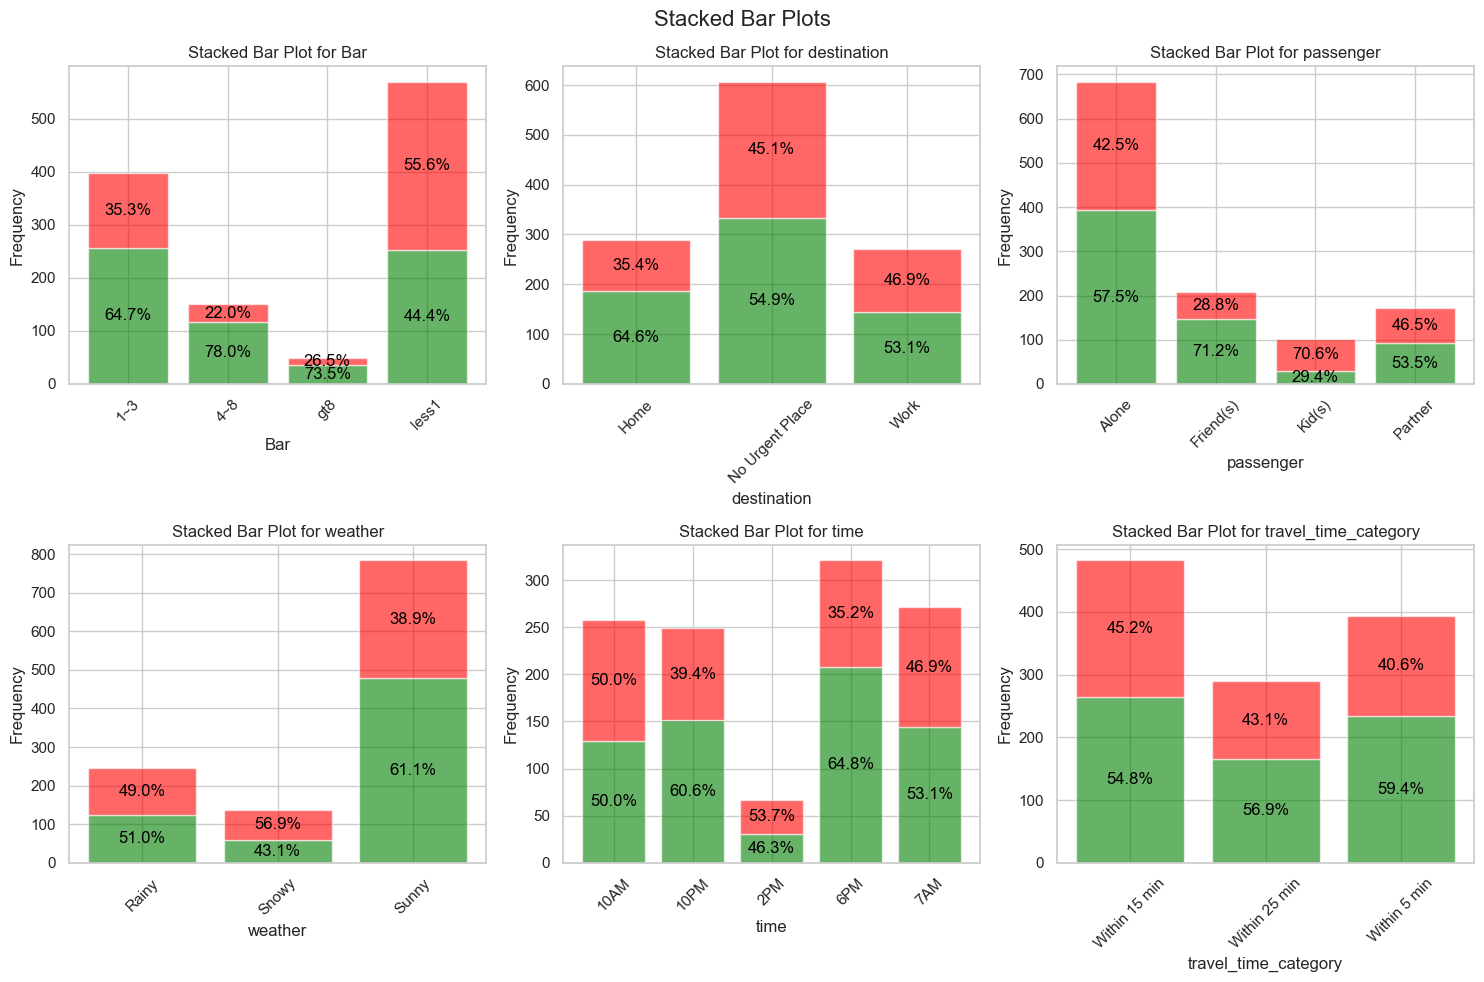
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                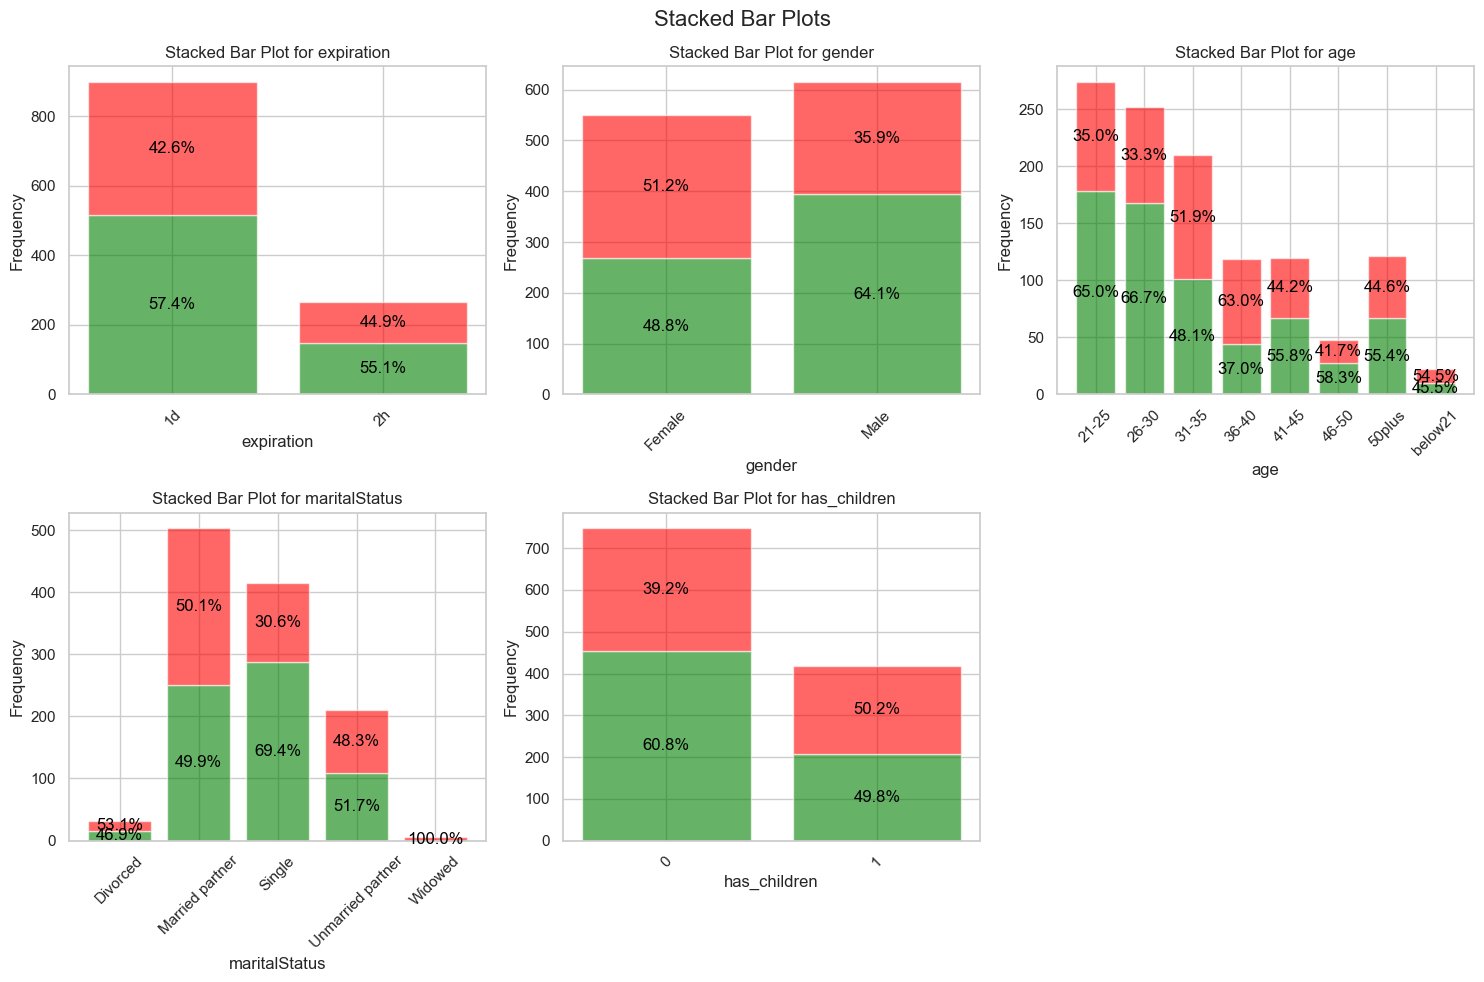
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

<br><br>


In [24]:


# def create_subplot_grid(df, columns, plot_title, rotation=0, yscale='linear'):
#     # Create a 3x2 subplot grid
#     fig, axes = plt.subplots(2, 3, figsize=(15,10), sharex=False)
#     axes = axes.flatten()

#     for i, column in enumerate(columns):
#         # Group by the column and calculate acceptance counts
#         acceptance_counts = df.groupby([column, 'Y']).size().unstack().fillna(0)
#         total_responses = acceptance_counts.sum(axis=1)
#         percentages = acceptance_counts.divide(total_responses, axis=0) * 100

#         # Plotting each segment with actual counts
#         for index, row in acceptance_counts.iterrows():
#             category_label = str(index)  # Convert tuple to string for labeling
#             total_count = row.sum()
#             accept_count = row.get(1, 0)
#             reject_count = row.get(0, 0)

#             # Percentages for annotation
#             accept_percentage = (accept_count / total_count) * 100
#             reject_percentage = (reject_count / total_count) * 100

#             axes[i].bar(category_label, accept_count, color='green', alpha=0.6)
#             axes[i].bar(category_label, reject_count, bottom=accept_count, color='red', alpha=0.6)

#             # Annotating the bars with percentages
#             if accept_count > 0:
#                 axes[i].text(category_label, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
#             if reject_count > 0:
#                 axes[i].text(category_label, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

#         axes[i].set_title(f'Stacked Bar Plot for {column}')
#         axes[i].set_xlabel(column)
#         axes[i].set_ylabel('Frequency')
#         axes[i].tick_params(axis='x', rotation=rotation)
    
#     # Adjust layout and add the main title
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.9, hspace=0.6)  # Increased hspace for better spacing between rows
#     fig.suptitle(plot_title, fontsize=16)
#     fig.subplots_adjust(wspace=0.4)

#     # Hide any unused subplots
#     for j in range(i + 1, len(axes)):
#         axes[j].axis('off')

#     image_base64 = save_plot_as_base64(buffer, plt, rotation,yscale)
    

#     return image_base64


df_bar_grid=df_bar.query("Bar not in ['never','no answer']").copy()
columns_to_plot = [ 'Bar','destination', 'passenger', 'weather', 'time', 'travel_time_category']
grid1_image64=create_subplot_grid(df_bar_grid, columns_to_plot, 'Stacked Bar Plots',45)
columns_to_plot = ['expiration', 'gender', 'age', 'maritalStatus', 'has_children']
grid2_image64=create_subplot_grid(df_bar_grid, columns_to_plot, 'Stacked Bar Plots',45)


markdown_text = f"""
# Comprehensive Analysis of Bar Coupon Acceptance Patterns (cont.)

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{grid1_image64}" alt="Bar Coupon Acceptance Rates By destination" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{grid2_image64}" alt="Bar Coupon Acceptance Rates By destination" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates By Lifestyle and Demographics</em>
            </td>
        </tr>
    </table>
</div>

<br><br>
"""

display(Markdown(markdown_text))


<br><br><br>
# 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
<br><br><br>


# Comprehensive Analysis of Bar Coupon Acceptance Patterns

<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                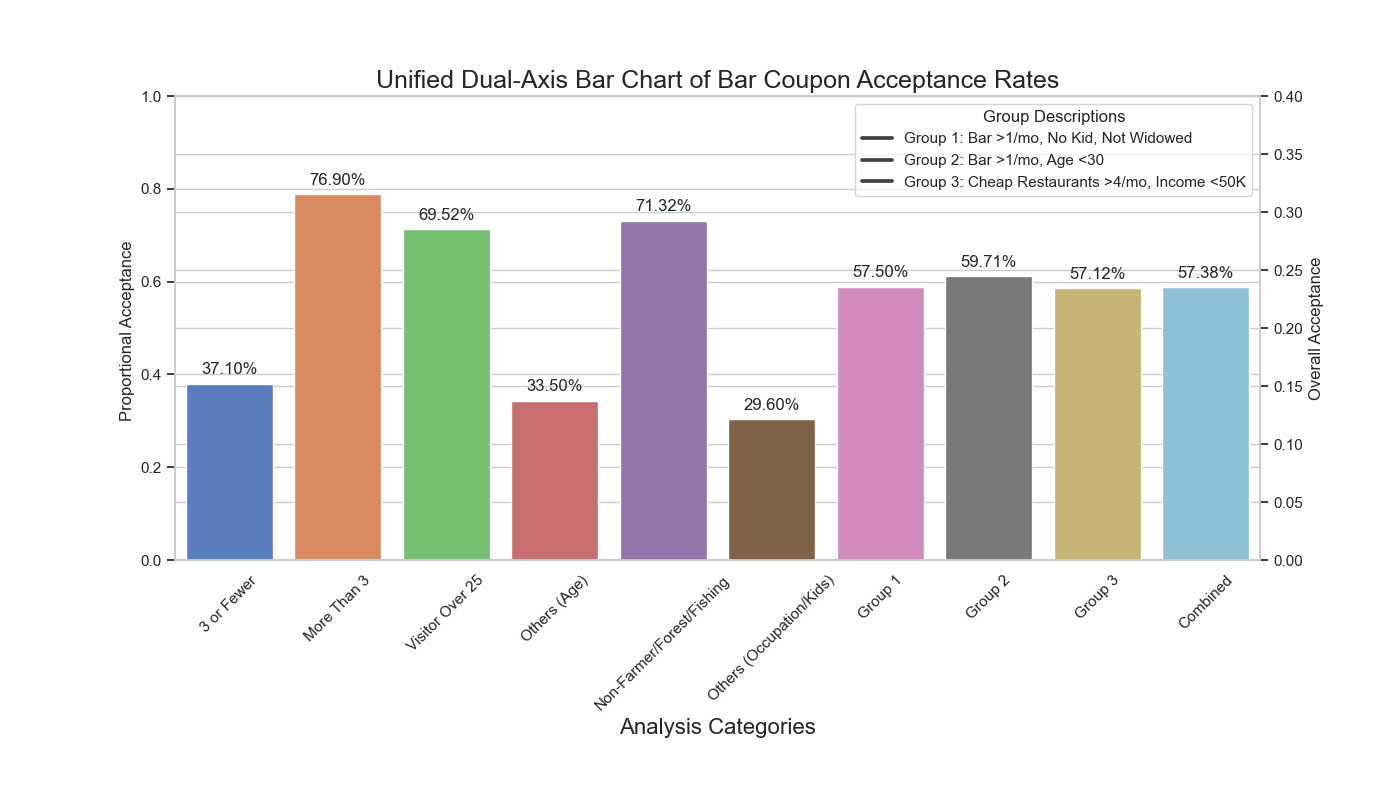
                <em>Figure: Bar Coupon Acceptance Rates</em>
            </td>
        </tr>
    </table>
</div>
<br><br>





## Section 1: Frequent Bar Visitors' Acceptance Rates
- **Observation**: Drivers who visit bars frequently, especially more than three times a month, show a notably high acceptance rate for bar coupons.
- **Insight**: Regular bar patrons are significantly more receptive to bar-related promotions, reflecting their established preference for these venues.

## Section 2: Influence of Age and Lifestyle on Acceptance Rates
- **Observation**: Younger drivers and those over 25 who frequent bars demonstrate a high acceptance rate.
- **Insight**: This indicates that age and lifestyle, particularly among younger drivers, strongly influence the acceptance of bar-related offers, likely due to a greater inclination towards social outings.

## Section 3: Economic Status and Dining Preferences
- **Observation**: Drivers with lower incomes and those who frequently dine at cheaper restaurants have higher acceptance rates for bar coupons.
- **Insight**: Economic sensitivity and a preference for value in spending seem to make discount offers like bar coupons appealing to this demographic.

## Section 4: Impact of Family Status on Coupon Acceptance
- **Observation**: Drivers who are not widowed and do not have kids as passengers show a higher tendency to accept bar coupons.
- **Insight**: Drivers without family constraints are more open to social activities, such as visiting bars, which increases their likelihood of accepting related offers.

## Section 5: Underage Drivers and Ethical Marketing
- **Observation**: A notable acceptance rate of 40% was found among drivers under the legal drinking age.
- **Insight**: This unexpected trend raises ethical concerns about marketing efforts targeted at underage individuals and emphasizes the importance of legal compliance in promotional activities.

## Overall Contextual Understanding
- **Key Insight**: All detailed acceptance rates should be contextualized within the overall acceptance rate of 41% for bar coupons.
- **Conclusion**: While specific categories exhibit high acceptance rates, they are part of the broader group of drivers generally open to bar promotions. This insight is crucial for businesses to tailor their marketing strategies effectively, ensuring they are ethically and legally sound while effectively targeting the right audience.

## General Conclusion

This comprehensive analysis demonstrates that drivers' decisions to accept bar coupons are influenced by a variety of factors, including bar visit frequency, age, economic status, dining preferences, and family situation. The study highlights the importance of understanding these nuanced behaviors for tailoring marketing strategies effectively. It also emphasizes the need for ethical considerations in targeting, especially concerning underage drivers.

## Hypothesis on Drivers Who Accepted Bar Coupons

### General Observations

The analysis has highlighted key trends in bar coupon acceptance rates across different driver groups, with some groups exhibiting acceptance rates as high as 79%.

### Characteristics of Drivers Accepting Coupons

- **Frequent Bar Visitors**: Regular bar patrons show a higher likelihood of accepting bar coupons, indicating a strong affinity for nightlife and social gatherings.
- **Younger Age Groups**: Drivers under 30 are more inclined towards accepting bar coupons, aligning with a greater engagement in social activities.
- **Specialized Groups**: Drivers who are not farmers, who don’t travel with kids, or who frequent bars more, tend to have higher acceptance rates, suggesting that lifestyle choices significantly influence their receptiveness to bar-related offers.
- **Income and Dining Preferences**: Drivers with lower incomes and a tendency to visit cheap restaurants often are likely to accept bar coupons, reflecting their preference for value-for-money entertainment options.

### Marketing Implications

A targeted marketing approach focusing on these demographics and lifestyle attributes is recommended. Strategies should be designed to appeal to younger, socially active drivers, emphasizing aspects of value and entertainment that resonate with their preferences and lifestyle habits.





In [25]:
# Common unified bar plot for the analyses from the previous sections
# Data for the plot
acceptance_rates_data_seaborn = pd.DataFrame({
    'Analysis': [
        'Overall Bar Coupon', 
        '3 or Fewer Times/Month', 
        'More Than 3 Times/Month',
        'Frequent_Bar_Visitor_Over_25',
        'Others (Age Comparison)',
        'Non_Farmer/Forest/Fishing_No_Kids_Freq_Bar_1_or_more',
        'Others (Occupation and Kids)',
        'Group 1 (Bar >1/mo, No Kid, Not Widowed)',
        'Group 2 (Bar >1/mo, Age <30)',
        'Group 3 (Cheap Restaurants >4/mo, Income <50K)',
        'Combined (Groups 1-3)'
    ],
    'Acceptance Rate': [
        1,   # Overall Bar Coupon
        0.371,  # 3 or Fewer Times/Month
        0.769,  # More Than 3 Times/Month
        0.6952, # Frequent_Bar_Visitor_Over_25
        0.335,  # Others (Age Comparison)
        0.7132, # Non_Farmer/Forest/Fishing_No_Kids_Freq_Bar_1_or_more
        0.296,  # Others (Occupation and Kids)
        0.575,  # Group 1
        0.5971, # Group 2
        0.5712, # Group 3
        0.5738  # Combined (Groups 1-3)
    ]
})
# Simplifying the Analysis names for the x-axis
simplified_analysis_names = ['Overall', '3 or Fewer', 'More Than 3', 'Visitor Over 25', 'Others (Age)', 
                             'Non-Farmer/Forest/Fishing', 'Others (Occupation/Kids)', 'Group 1', 'Group 2', 'Group 3', 'Combined']

acceptance_rates_data_seaborn['Simplified Analysis'] = simplified_analysis_names

# Separating the 'Overall Bar Coupon' from the rest of the data
# overall_data = acceptance_rates_data_seaborn[acceptance_rates_data_seaborn['Analysis'] == 'Overall Bar Coupon'].copy()
rest_of_data = acceptance_rates_data_seaborn[acceptance_rates_data_seaborn['Analysis'] != 'Overall Bar Coupon'].copy()

# Calculate the detailed acceptance rates as a proportion of the overall 41% rate
rest_of_data['Proportional Acceptance Rate'] = rest_of_data['Acceptance Rate'] * 0.41



# Creating a dual-axis bar plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the overall rate on the primary axis
sns.barplot(x=rest_of_data['Analysis'], y=rest_of_data['Acceptance Rate'], ax=ax1, color='lightblue')
ax1.set_ylabel('Proportional Acceptance ')
ax1.set_ylim(0, 1)  # Adjust the y-axis to show percentages

# Creating a secondary axis for the detailed rates
ax2 = ax1.twinx()
sns_bar_plot_rest = sns.barplot(x='Simplified Analysis', y='Proportional Acceptance Rate', data=rest_of_data, ax=ax2, palette='muted')
ax2.set_ylabel('Overall Acceptance')
ax2.set_ylim(0, 0.4)  # Adjust the y-axis to align with the proportion of the overall rate

rest_of_data = acceptance_rates_data_seaborn[acceptance_rates_data_seaborn['Analysis'] != 'Overall Bar Coupon']
# Adding legend for Group 1-3 descriptions
plt.legend(title='Group Descriptions', labels=[
    'Group 1: Bar >1/mo, No Kid, Not Widowed',
    'Group 2: Bar >1/mo, Age <30',
    'Group 3: Cheap Restaurants >4/mo, Income <50K'
], loc='upper right')

# Adding proportional acceptance rates on top of each bar
for p in sns_bar_plot_rest.patches:
    height = p.get_height()
    ax2.annotate(f'{height/0.41:.2%}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points')

# Adjusting x-tick properties
ax1.set_xticklabels(rest_of_data['Simplified Analysis'], rotation=45)
ax1.set_xlabel('Analysis Categories',fontsize=16)

plt.title('Unified Dual-Axis Bar Chart of Bar Coupon Acceptance Rates', fontsize=18)
plt.subplots_adjust(bottom=0.3)
buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
Bar_Unified_Acceptance_image64 = base64.b64encode(buffer.getvalue()).decode()





markdown_text = f"""
# Comprehensive Analysis of Bar Coupon Acceptance Patterns

<br><br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{Bar_Unified_Acceptance_image64}" alt="Bar Coupon Overall Acceptance Rates" style="width: 100%;"/>
                <em>Figure: Bar Coupon Acceptance Rates</em>
            </td>
        </tr>
    </table>
</div>
<br><br>





## Section 1: Frequent Bar Visitors' Acceptance Rates
- **Observation**: Drivers who visit bars frequently, especially more than three times a month, show a notably high acceptance rate for bar coupons.
- **Insight**: Regular bar patrons are significantly more receptive to bar-related promotions, reflecting their established preference for these venues.

## Section 2: Influence of Age and Lifestyle on Acceptance Rates
- **Observation**: Younger drivers and those over 25 who frequent bars demonstrate a high acceptance rate.
- **Insight**: This indicates that age and lifestyle, particularly among younger drivers, strongly influence the acceptance of bar-related offers, likely due to a greater inclination towards social outings.

## Section 3: Economic Status and Dining Preferences
- **Observation**: Drivers with lower incomes and those who frequently dine at cheaper restaurants have higher acceptance rates for bar coupons.
- **Insight**: Economic sensitivity and a preference for value in spending seem to make discount offers like bar coupons appealing to this demographic.

## Section 4: Impact of Family Status on Coupon Acceptance
- **Observation**: Drivers who are not widowed and do not have kids as passengers show a higher tendency to accept bar coupons.
- **Insight**: Drivers without family constraints are more open to social activities, such as visiting bars, which increases their likelihood of accepting related offers.

## Section 5: Underage Drivers and Ethical Marketing
- **Observation**: A notable acceptance rate of 40% was found among drivers under the legal drinking age.
- **Insight**: This unexpected trend raises ethical concerns about marketing efforts targeted at underage individuals and emphasizes the importance of legal compliance in promotional activities.

## Overall Contextual Understanding
- **Key Insight**: All detailed acceptance rates should be contextualized within the overall acceptance rate of 41% for bar coupons.
- **Conclusion**: While specific categories exhibit high acceptance rates, they are part of the broader group of drivers generally open to bar promotions. This insight is crucial for businesses to tailor their marketing strategies effectively, ensuring they are ethically and legally sound while effectively targeting the right audience.

## General Conclusion

This comprehensive analysis demonstrates that drivers' decisions to accept bar coupons are influenced by a variety of factors, including bar visit frequency, age, economic status, dining preferences, and family situation. The study highlights the importance of understanding these nuanced behaviors for tailoring marketing strategies effectively. It also emphasizes the need for ethical considerations in targeting, especially concerning underage drivers.

## Hypothesis on Drivers Who Accepted Bar Coupons

### General Observations

The analysis has highlighted key trends in bar coupon acceptance rates across different driver groups, with some groups exhibiting acceptance rates as high as 79%.

### Characteristics of Drivers Accepting Coupons

- **Frequent Bar Visitors**: Regular bar patrons show a higher likelihood of accepting bar coupons, indicating a strong affinity for nightlife and social gatherings.
- **Younger Age Groups**: Drivers under 30 are more inclined towards accepting bar coupons, aligning with a greater engagement in social activities.
- **Specialized Groups**: Drivers who are not farmers, who don’t travel with kids, or who frequent bars more, tend to have higher acceptance rates, suggesting that lifestyle choices significantly influence their receptiveness to bar-related offers.
- **Income and Dining Preferences**: Drivers with lower incomes and a tendency to visit cheap restaurants often are likely to accept bar coupons, reflecting their preference for value-for-money entertainment options.

### Marketing Implications

A targeted marketing approach focusing on these demographics and lifestyle attributes is recommended. Strategies should be designed to appeal to younger, socially active drivers, emphasizing aspects of value and entertainment that resonate with their preferences and lifestyle habits.



"""

display(Markdown(markdown_text))

In [26]:
# saving cleaned dataset
df_cleaned.to_csv('data/coupons_cleaned.csv', index=False)

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<br><br>
#  Coffee House Coupon Analysis

In this report, we explore the Coffee House coupon category to identify factors influencing coupon acceptance. We focus on variables such as time of day and passenger type to understand how they affect acceptance rates. The goal is to derive actionable insights for targeted marketing and improved customer engagement.



<br><br>
# Coffee House Coupon Acceptance Rate

The proportion of total observations that chose to accept Coffee House coupons is **0.4992** or **49.92%**. Interestingly, the acceptance rate is nearly 50-50, indicating a balanced distribution between those who accept and those who do not accept these coupons. This equal split necessitates a deeper dive into the data to understand the underlying factors influencing these decisions.

We will be conducting more analyses on Coffee House coupons next to uncover these influencing factors and patterns.

<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                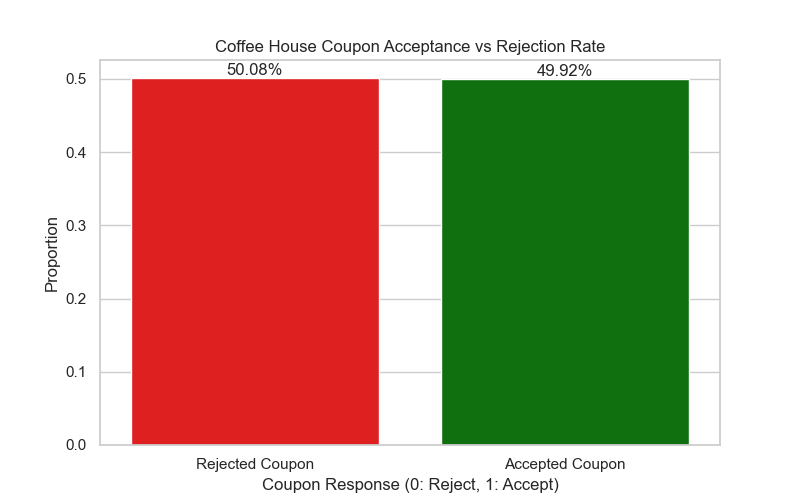
                <em>Figure: Coffee Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>





In [27]:
df_coffee = df_cleaned.query("coupon == 'Coffee House'").copy()
coffee_frequency_count = df_coffee['Y'].value_counts()
coffee_proportion_data = coffee_frequency_count / len(df_coffee)

plt.figure(figsize=(8, 5))
custom_palette = ['red', 'green']
sns.barplot(x=coffee_proportion_data.index, y=coffee_proportion_data.values, palette=custom_palette)

# Adding the percentage on top of each bar
for index, value in enumerate(reversed(coffee_proportion_data)):
    plt.text(len(coffee_proportion_data) - 1 - index, value, f'{value:.2%}', ha='center', va='bottom')

plt.title('Coffee House Coupon Acceptance vs Rejection Rate')
plt.ylabel('Proportion')
plt.xlabel('Coupon Response (0: Reject, 1: Accept)')
plt.xticks([1, 0], ['Accepted Coupon', 'Rejected Coupon'])

buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
coffee_coupon_acceptance_image64 = base64.b64encode(buffer.getvalue()).decode()





markdown_text = f"""
<br><br>
# Coffee House Coupon Acceptance Rate

The proportion of total observations that chose to accept Coffee House coupons is **{coffee_proportion_data[1]:.4}** or **{coffee_proportion_data[1]:.2%}**. Interestingly, the acceptance rate is nearly 50-50, indicating a balanced distribution between those who accept and those who do not accept these coupons. This equal split necessitates a deeper dive into the data to understand the underlying factors influencing these decisions.

We will be conducting more analyses on Coffee House coupons next to uncover these influencing factors and patterns.

<br>
<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coffee_coupon_acceptance_image64}"  alt="Coffee Coupons Acceptance" style="width: 100%;"/>
                <em>Figure: Coffee Coupons Acceptance Rate</em>
            </td>
        </tr>
    </table>
</div>



"""
display(Markdown(markdown_text))


# Analysis of Coffee House Coupon Acceptance: Alone vs Others

In this section of our study, we explored the acceptance rates of Coffee House coupons among two categories of drivers: those driving alone and those accompanied by others. We hypothesized that drivers who were alone would be more likely to accept the coupons than those with companions.

## Expectations and Methodology

Our expectation was based on the premise that drivers driving alone might be more inclined to accept offers, perhaps due to the lack of influence from passengers. To examine this hypothesis, we adopted a two-fold approach in our analysis:

1. **Frequency Analysis**: We commenced by examining the frequency of drivers driving alone versus those with others, to get an understanding of the sample data distribution.
2. **Acceptance/Rejection Rates**: Subsequently, we compared the acceptance and rejection rates of the coupons for both groups, using a plot for a visual representation of these differences.



<div align="center">
    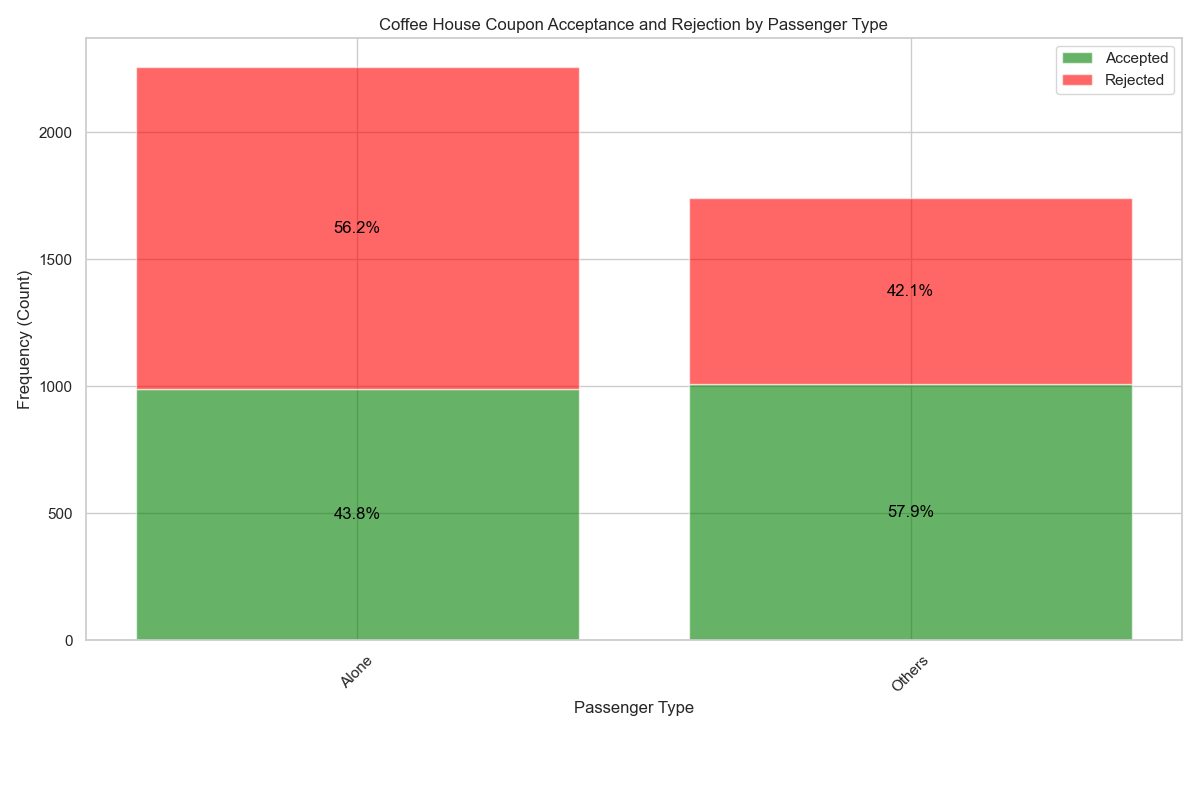
    <br>
    <em>Figure: Coffee Coupons Acceptance Rate for Alone vs Others</em>
</div>

## Insights from the Plot
<br>

**Surprisingly, the plot above reveals that the acceptance rate for drivers driving alone was less than 50%.** This outcome was unexpected, as our initial hypothesis predicted a higher acceptance rate in this group. The results suggest a contrary trend, indicating that being alone does not necessarily increase the likelihood of coupon acceptance. This finding prompts further investigation into the factors influencing these decisions, which will be the focus of our next section of analysis.



In [28]:
# Analyzing acceptance rates for "Alone" vs "Others" (not alone) in terms of passengers

# Creating a new column to categorize the passenger data into 'Alone' and 'Others'
df_coffee['Passenger Category'] = df_coffee['passenger'].apply(lambda x: 'Alone' if x == 'Alone' else 'Others')

# Calculating acceptance rates for each passenger category
passenger_category_acceptance_rates = df_coffee.groupby('Passenger Category')['Y'].mean()

# # Plotting the results
# plt.figure(figsize=(8, 6))
# sns.barplot(x=passenger_category_acceptance_rates.index, y=passenger_category_acceptance_rates.values)
# plt.title('Acceptance Rates of Coffee House Coupons: Alone vs Others')
# plt.xlabel('Passenger Category')
# plt.ylabel('Acceptance Rate')
# plt.show()


# Group by passenger type  and calculate counts and acceptance rates
passenger_grouped = df_coffee.groupby('Passenger Category')
counts_passenger = passenger_grouped.size()
acceptance_counts_passenger = passenger_grouped['Y'].sum()

# Calculating rejection counts for passengers
rejection_counts_passenger = counts_passenger - acceptance_counts_passenger

# Preparing data for plotting for passenger types
plot_data_passenger = pd.DataFrame({'Count': counts_passenger, 'Accepted': acceptance_counts_passenger, 'Rejected': rejection_counts_passenger})
plot_data_passenger = plot_data_passenger.sort_index()  # Ordering by passenger type

# Creating the stacked bar chart with transparency for passenger types
plt.figure(figsize=(12, 8))
plt.bar(plot_data_passenger.index, plot_data_passenger['Accepted'], label='Accepted', color='green', alpha=0.6)
plt.bar(plot_data_passenger.index, plot_data_passenger['Rejected'], bottom=plot_data_passenger['Accepted'], label='Rejected', color='red', alpha=0.6)

# Annotating each bar with percentages for passenger types
for idx, row in plot_data_passenger.iterrows():
    total_count = row['Count']
    accept_count = row['Accepted']
    reject_count = row['Rejected']

    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    if accept_count > 0:
        plt.text(idx, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
    if reject_count > 0:
        plt.text(idx, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.title('Coffee House Coupon Acceptance and Rejection by Passenger Type')
plt.ylabel('Frequency (Count)')
plt.xlabel('Passenger Type')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
coffee_coupon_alone_acceptance_image64 = base64.b64encode(buffer.getvalue()).decode()






markdown_text= f"""
# Analysis of Coffee House Coupon Acceptance: Alone vs Others

In this section of our study, we explored the acceptance rates of Coffee House coupons among two categories of drivers: those driving alone and those accompanied by others. We hypothesized that drivers who were alone would be more likely to accept the coupons than those with companions.

## Expectations and Methodology

Our expectation was based on the premise that drivers driving alone might be more inclined to accept offers, perhaps due to the lack of influence from passengers. To examine this hypothesis, we adopted a two-fold approach in our analysis:

1. **Frequency Analysis**: We commenced by examining the frequency of drivers driving alone versus those with others, to get an understanding of the sample data distribution.
2. **Acceptance/Rejection Rates**: Subsequently, we compared the acceptance and rejection rates of the coupons for both groups, using a plot for a visual representation of these differences.



<div align="center">
    <img src="data:image/png;base64,{coffee_coupon_alone_acceptance_image64}"  alt="Coffee Coupons Acceptance" style="width: 80%;"/>
    <br>
    <em>Figure: Coffee Coupons Acceptance Rate for Alone vs Others</em>
</div>

## Insights from the Plot
<br>

**Surprisingly, the plot above reveals that the acceptance rate for drivers driving alone was less than 50%.** This outcome was unexpected, as our initial hypothesis predicted a higher acceptance rate in this group. The results suggest a contrary trend, indicating that being alone does not necessarily increase the likelihood of coupon acceptance. This finding prompts further investigation into the factors influencing these decisions, which will be the focus of our next section of analysis.

"""

display(Markdown(markdown_text))


## Further Analysis: Acceptance Rates by Passenger Types and Time of Day

Building on our initial findings, we expanded our analysis to include the acceptance rates of Coffee House coupons across all passenger types. Additionally, we examined the acceptance rates in relation to the time of day. Our underlying assumption was that Coffee Houses would see higher coupon acceptance rates earlier in the day.

### Analysis Overview

1. **Acceptance Rates by Passenger Type**: This analysis aims to provide a broader understanding of coupon acceptance trends across different passenger categories.
2. **Acceptance Rates by Time of Day**: We hypothesized that the time of day significantly impacts the likelihood of coupon acceptance, with a higher rate expected in the morning hours.

### Visual Representation of Findings
<div align="center">
    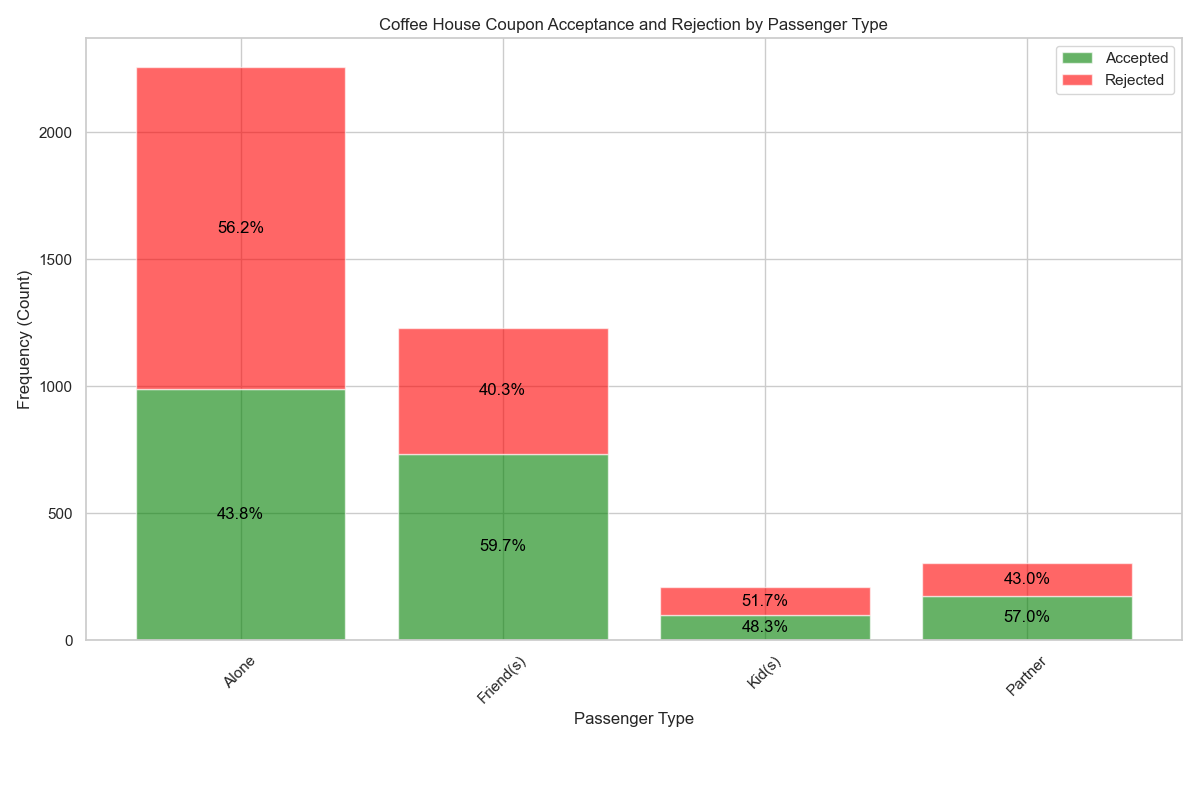
    <br>
    <em>Figure 1: Acceptance Rates by Passenger Type</em>
    <br><br>
    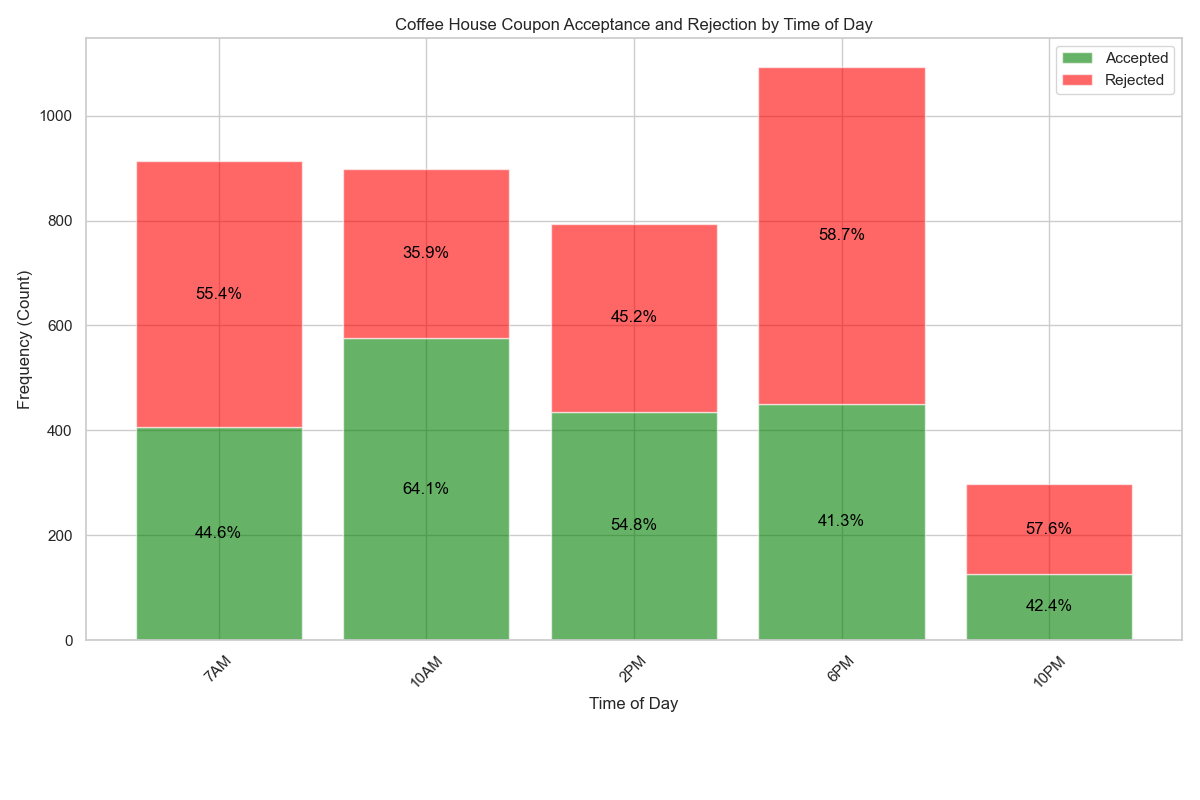
    <br>
    <em>Figure 2: Acceptance Rates by Time of Day</em>
</div>


The figures above provide insightful visualizations of the acceptance patterns. Figure 1 demonstrates that, as expected, the frequency of coupons offered to individuals driving alone is the highest among all passenger types. However, it's notable that the acceptance rate for this group is below 50%. **Figure 2 presents a curious distribution regarding the time of day. The frequency of the 2pm coupons are lower, diverging from the expected trend.** This anomaly in the data demands more investigation, which we will undertake in the next section of our analysis. 


In [29]:
# plotting by passenger type and also time

# Focus on Coffee House coupons
coffee_house_df = df_cleaned[df_cleaned['coupon'] == "Coffee House"]

# Group by time and calculate counts and acceptance rates
time_grouped = coffee_house_df.groupby('time')
counts = time_grouped.size()
acceptance_counts = time_grouped['Y'].sum()

# Calculating rejection counts
rejection_counts = counts - acceptance_counts

# Preparing data for plotting
plot_data = pd.DataFrame({'Count': counts, 'Accepted': acceptance_counts, 'Rejected': rejection_counts})
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
plot_data = plot_data.loc[time_order]  # Ordering by time

# Creating the stacked bar chart with transparency
plt.figure(figsize=(12, 8))
plt.bar(plot_data.index, plot_data['Accepted'], label='Accepted', color='green', alpha=0.6)
plt.bar(plot_data.index, plot_data['Rejected'], bottom=plot_data['Accepted'], label='Rejected', color='red', alpha=0.6)

# Annotating each bar with percentages
for idx, row in plot_data.iterrows():
    total_count = row['Count']
    accept_count = row['Accepted']
    reject_count = row['Rejected']

    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    if accept_count > 0:
        plt.text(idx, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
    if reject_count > 0:
        plt.text(idx, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.title('Coffee House Coupon Acceptance and Rejection by Time of Day')
plt.ylabel('Frequency (Count)')
plt.xlabel('Time of Day')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
coffee_coupon_time_acceptance_image64 = base64.b64encode(buffer.getvalue()).decode()





# Group by passenger type  and calculate counts and acceptance rates
passenger_grouped = coffee_house_df.groupby('passenger')
counts_passenger = passenger_grouped.size()
acceptance_counts_passenger = passenger_grouped['Y'].sum()

# Calculating rejection counts for passengers
rejection_counts_passenger = counts_passenger - acceptance_counts_passenger

# Preparing data for plotting for passenger types
plot_data_passenger = pd.DataFrame({'Count': counts_passenger, 'Accepted': acceptance_counts_passenger, 'Rejected': rejection_counts_passenger})
plot_data_passenger = plot_data_passenger.sort_index()  # Ordering by passenger type

# Creating the stacked bar chart with transparency for passenger types
plt.figure(figsize=(12, 8))
plt.bar(plot_data_passenger.index, plot_data_passenger['Accepted'], label='Accepted', color='green', alpha=0.6)
plt.bar(plot_data_passenger.index, plot_data_passenger['Rejected'], bottom=plot_data_passenger['Accepted'], label='Rejected', color='red', alpha=0.6)

# Annotating each bar with percentages for passenger types
for idx, row in plot_data_passenger.iterrows():
    total_count = row['Count']
    accept_count = row['Accepted']
    reject_count = row['Rejected']

    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    if accept_count > 0:
        plt.text(idx, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
    if reject_count > 0:
        plt.text(idx, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.title('Coffee House Coupon Acceptance and Rejection by Passenger Type')
plt.ylabel('Frequency (Count)')
plt.xlabel('Passenger Type')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
coffee_coupon_passenger__acceptance_image64 = base64.b64encode(buffer.getvalue()).decode()


markdown_text= f"""
## Further Analysis: Acceptance Rates by Passenger Types and Time of Day

Building on our initial findings, we expanded our analysis to include the acceptance rates of Coffee House coupons across all passenger types. Additionally, we examined the acceptance rates in relation to the time of day. Our underlying assumption was that Coffee Houses would see higher coupon acceptance rates earlier in the day.

### Analysis Overview

1. **Acceptance Rates by Passenger Type**: This analysis aims to provide a broader understanding of coupon acceptance trends across different passenger categories.
2. **Acceptance Rates by Time of Day**: We hypothesized that the time of day significantly impacts the likelihood of coupon acceptance, with a higher rate expected in the morning hours.

### Visual Representation of Findings
<div align="center">
    <img src="data:image/png;base64,{coffee_coupon_passenger__acceptance_image64}" alt="Acceptance by Passenger Type" style="width: 80%;"/>
    <br>
    <em>Figure 1: Acceptance Rates by Passenger Type</em>
    <br><br>
    <img src="data:image/png;base64,{coffee_coupon_time_acceptance_image64}"  alt="Acceptance by Time of Day" style="width: 80%;"/>
    <br>
    <em>Figure 2: Acceptance Rates by Time of Day</em>
</div>


The figures above provide insightful visualizations of the acceptance patterns. Figure 1 demonstrates that, as expected, the frequency of coupons offered to individuals driving alone is the highest among all passenger types. However, it's notable that the acceptance rate for this group is below 50%. **Figure 2 presents a curious distribution regarding the time of day. The frequency of the 2pm coupons are lower, diverging from the expected trend.** This anomaly in the data demands more investigation, which we will undertake in the next section of our analysis. 
"""

display(Markdown(markdown_text))





# Analysis Results: Coffee House Coupon Offers to Solo Travelers

Key findings from our analysis of Coffee House coupon offers to passengers traveling alone include:

- **No Offers at 2 PM**: The dataset shows no coupon offers to solo drivers at 2 PM. This absence is significant, as it might indicate a gap in the coupon distribution strategy.
- **Potential Reasons for Data Absence**:
  - **Missing Data**: The lack of offers at this time could be due to missing data, which might represent an oversight in the data collection process.
  - **User Error During Data Compilation**: There is also a possibility that the absence of data for this time slot results from user error during the data manipulation or compilation stage.
- **Impact on Data Interpretation**: The absence of offers at 2 PM could skew the analytical results. Since this time is typically popular for coffee breaks, not targeting solo drivers during this period might represent a missed opportunity.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                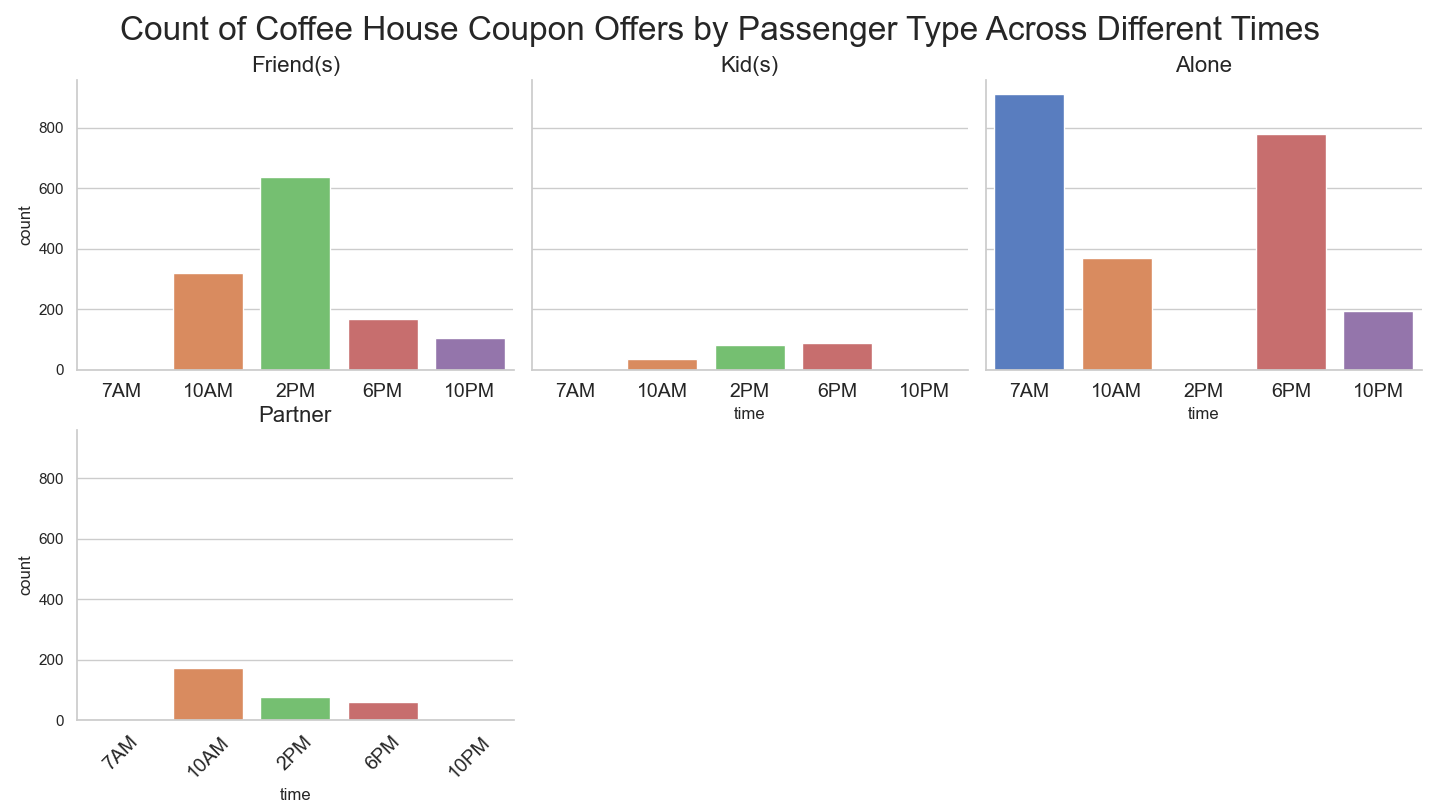
                <em>Figure: Count of Coffee House Coupon Offers for Passengers by Time of Day</em>
            </td>
        </tr>
        <tr>
        <td style="text-align: center;">
                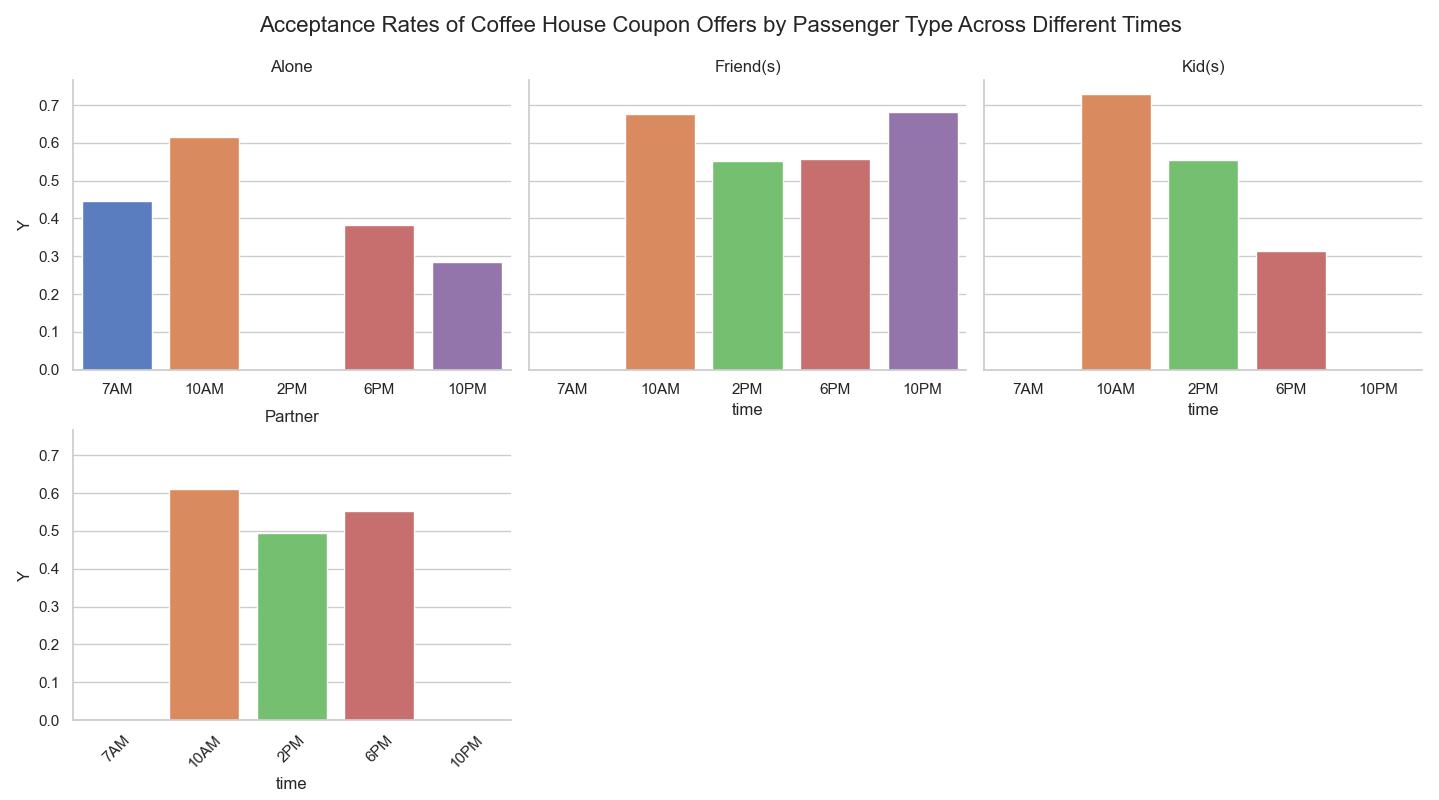
                <em>Figure: Acceptance Rates of Coffee House Coupon Offers by Passenger Type Across Different Times</em>
            </td>
        </tr>
    </table>
</div>


 


In [30]:

# # Filtering the data for passengers who are alone
# alone_data = coffee_house_df[coffee_house_df['passenger'] == 'Alone']


# # count analysis of alone data by time
# alone_time_counts = alone_data['time'].value_counts()

# Manually specifying the order of the times
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']




g = sns.FacetGrid(coffee_house_df, col='passenger', col_wrap=3, height=4, aspect=1.2, sharex=False)
g.map(sns.countplot, 'time', order=time_order, palette='muted')

# Adding titles and adjusting layout
g.set_titles("{col_name}",  size=16)
g.fig.suptitle('Count of Coffee House Coupon Offers by Passenger Type Across Different Times', fontsize=24)
g.fig.subplots_adjust(top=0.9, bottom=0.1) # Adjusting space on top to fit the title
plt.xticks(rotation=45)

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14) 

buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()


# Encode the first plot image as a base64 string
coffee_coupon_by_time_image64 = base64.b64encode(buffer.getvalue()).decode()



# Calculating acceptance rates for each passenger type across different times
# Group by 'passenger' and 'time', then calculate the mean of 'Y' for acceptance rate
acceptance_rate_real = coffee_house_df.groupby(['passenger', 'time'])['Y'].mean().reset_index()

# Creating a FacetGrid to plot the acceptance rates
g_real = sns.FacetGrid(acceptance_rate_real, col='passenger', col_wrap=3, height=4, aspect=1.2, sharex=False)
g_real.map(sns.barplot, 'time', 'Y', order=time_order, palette='muted')

# Adding titles and adjusting layout
g_real.set_titles("{col_name}")
g_real.fig.suptitle('Acceptance Rates of Coffee House Coupon Offers by Passenger Type Across Different Times', fontsize=16)
g_real.fig.subplots_adjust(top=0.9, bottom=0.1) # Adjusting space on top to fit the title
plt.xticks(rotation=45)


buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
coupon_coffee_acceptance__time_image64 = base64.b64encode(buffer.getvalue()).decode()







markdown_text= f"""
# Analysis Results: Coffee House Coupon Offers to Solo Travelers

Key findings from our analysis of Coffee House coupon offers to passengers traveling alone include:

- **No Offers at 2 PM**: The dataset shows no coupon offers to solo drivers at 2 PM. This absence is significant, as it might indicate a gap in the coupon distribution strategy.
- **Potential Reasons for Data Absence**:
  - **Missing Data**: The lack of offers at this time could be due to missing data, which might represent an oversight in the data collection process.
  - **User Error During Data Compilation**: There is also a possibility that the absence of data for this time slot results from user error during the data manipulation or compilation stage.
- **Impact on Data Interpretation**: The absence of offers at 2 PM could skew the analytical results. Since this time is typically popular for coffee breaks, not targeting solo drivers during this period might represent a missed opportunity.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coffee_coupon_by_time_image64}"  alt="Count of Coffee House Coupon Offers for Passengers by Time of Day" style="width: 100%;"/>
                <em>Figure: Count of Coffee House Coupon Offers for Passengers by Time of Day</em>
            </td>
        </tr>
        <tr>
        <td style="text-align: center;">
                <img src="data:image/png;base64,{coupon_coffee_acceptance__time_image64}"  alt="Acceptance Rates of Coffee House Coupon Offers by Passenger Type Across Different Times" style="width: 100%;"/>
                <em>Figure: Acceptance Rates of Coffee House Coupon Offers by Passenger Type Across Different Times</em>
            </td>
        </tr>
    </table>
</div>


 
"""

display(Markdown(markdown_text))



# Coffee House Coupon Analysis - Exploring Additional Attributes

As part of our ongoing analysis of the Coffee House coupon dataset, we extended our investigation to additional attributes to see how they influence coupon acceptance rates. Our aim was to uncover any significant patterns or insights that could be gleaned from these different aspects.

<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                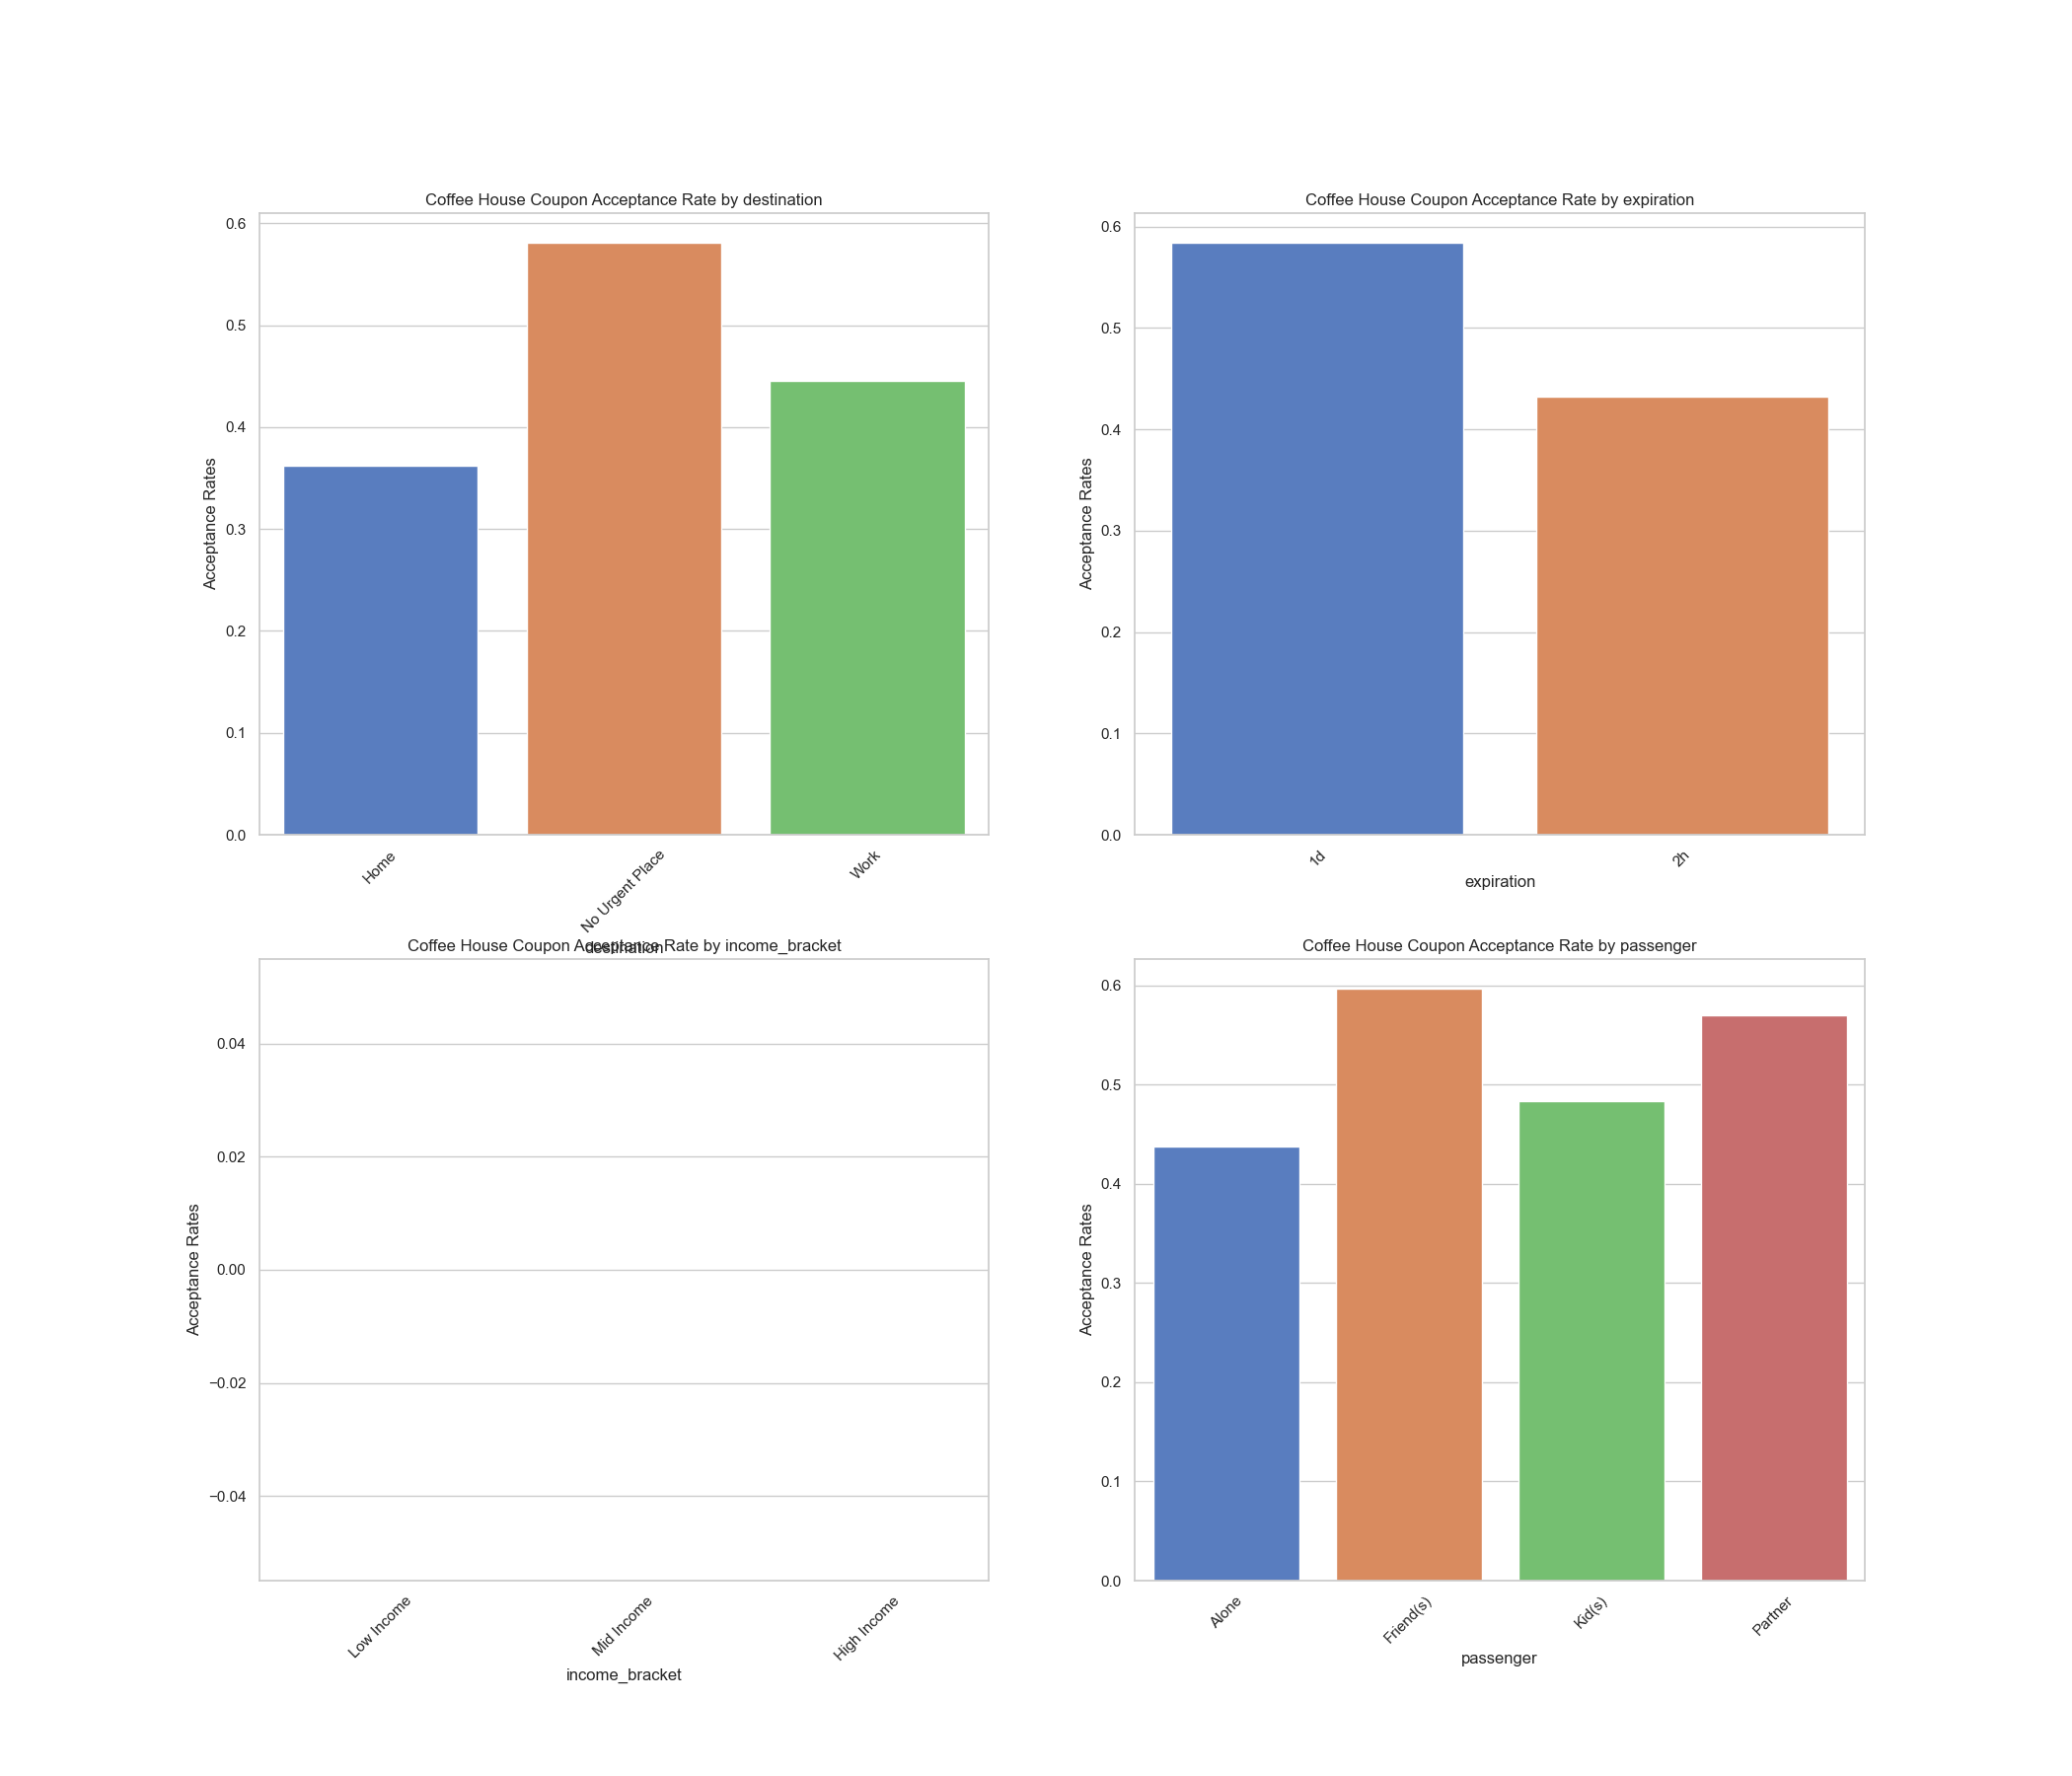
                <em>Figure: Coffee House Coupon Acceptance Rates</em>
            </td>
        </tr>
    </table>
</div>
<br>

## Expanded Analysis Approach

We analyzed various attributes including 'destination', 'expiration', 'income_bracket', and 'passenger' to understand their impact on coupon acceptance rates. 

## Interesting Findings

Upon reviewing the results, one attribute, in particular, stood out - **'destination'**. We observed that the highest acceptance rate was associated with coupons where the destination was  **"No Urgent Place"**. This intriguing finding led us to delve deeper into this attribute in the subsequent parts of our analysis.



In the following sections, we will focus more specifically on the 'destination' attribute, examining its relationship with other factors in the dataset. We aim to understand why coupons with a non-urgent destination have higher acceptance rates and what implications this might have for marketing strategies and customer behavior understanding.


In [31]:

# # Create a temporary DataFrame for plotting
# temp_df = coffee_house_df.copy()
# #temp_df = temp_df[temp_df['Y'] == 1]

# # Convert 'direction_same' and 'Y' to string type in the temporary DataFrame
# temp_df['direction_same'] = temp_df['direction_same'].astype(str)
# temp_df['Y'] = temp_df['Y'].astype(str)
# temp_df['temperature'] = temp_df['temperature'].astype(str)

# Define the groups and their corresponding hues
groups = [
    {'columns': [ 'destination'], 'hue': 'destination'},
    {'columns': [ 'expiration'], 'hue': 'expiration'},
    {'columns': [ 'income_bracket'], 'hue': 'income_bracket'},
    {'columns': [ 'passenger'], 'hue': 'passenger'}
    
]
    



# Create a temporary DataFrame for plotting
temp_df = coffee_house_df.copy()

# Convert 'direction_same' to string type in the temporary DataFrame
temp_df['direction_same'] = temp_df['direction_same'].astype(str)
temp_df['Y'] = temp_df['Y'].astype(int)
temp_df['temperature'] = temp_df['temperature'].astype(str)

#Function to calculate acceptance rate
def calculate_acceptance_rate(group):
    total_coupons = len(group)
    accepted_coupons = group.sum()
    return accepted_coupons / total_coupons if total_coupons > 0 else 0


   
    


# Ordering for 'income_bracket'
income_range_order = ['Low Income', 'Mid Income', 'High Income']
time_order = ['7AM','10AM','2PM','6PM','10PM']


# Determine the grid size for the subplots
n = len(groups)
grid_size = (int(np.ceil(n / 2)), 2)  # Adjust the grid dimensions as needed

# Set up the matplotlib figure with dynamic grid size
fig, axes = plt.subplots(*grid_size, figsize=(21, 18))

# Flatten the axes array for easy indexing
axes = axes.flatten()
# Ensure your calculate_acceptance_rate function is defined earlier in the code

# Plot for each grouping
for i, group in enumerate(groups):
    # Calculate acceptance rates for the group
    grouped_data = temp_df.groupby(group['columns']).agg({'Y': calculate_acceptance_rate}).reset_index().rename(columns={'Y': 'acceptance_rate'})
    
    # Check if the group is 'income_bracket' to apply ordering
    if group['columns'][0] == 'income_bracket':
        sns.barplot(x=group['columns'][0], y='acceptance_rate', order=income_range_order, 
                    data=grouped_data, ax=axes[i], palette='muted')
    elif group['columns'][0] == 'time':
        sns.barplot(x=group['columns'][0], y='acceptance_rate', order=time_order, 
                    data=grouped_data, ax=axes[i], palette='muted')
    else:
        sns.barplot(x=group['columns'][0], y='acceptance_rate', 
                    data=grouped_data, ax=axes[i], palette='muted')

    axes[i].set_title(f'Coffee House Coupon Acceptance Rate by {", ".join(group["columns"])}')
    axes[i].set_xlabel(f'{", ".join(group["columns"])}')
    axes[i].set_ylabel('Acceptance Rates')
    axes[i].tick_params(axis='x', rotation=45)

    buffer.seek(0)
    
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
coffee_more_attributes_image64 = base64.b64encode(buffer.getvalue()).decode()




markdown_text = f"""

# Coffee House Coupon Analysis - Exploring Additional Attributes

As part of our ongoing analysis of the Coffee House coupon dataset, we extended our investigation to additional attributes to see how they influence coupon acceptance rates. Our aim was to uncover any significant patterns or insights that could be gleaned from these different aspects.

<br>

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coffee_more_attributes_image64}"  alt="Coffee House Coupon Acceptance Rates" style="width: 100%;"/>
                <em>Figure: Coffee House Coupon Acceptance Rates</em>
            </td>
        </tr>
    </table>
</div>
<br>

## Expanded Analysis Approach

We analyzed various attributes including 'destination', 'expiration', 'income_bracket', and 'passenger' to understand their impact on coupon acceptance rates. 

## Interesting Findings

Upon reviewing the results, one attribute, in particular, stood out - **'destination'**. We observed that the highest acceptance rate was associated with coupons where the destination was  **"No Urgent Place"**. This intriguing finding led us to delve deeper into this attribute in the subsequent parts of our analysis.



In the following sections, we will focus more specifically on the 'destination' attribute, examining its relationship with other factors in the dataset. We aim to understand why coupons with a non-urgent destination have higher acceptance rates and what implications this might have for marketing strategies and customer behavior understanding.
"""

display(Markdown(markdown_text))



# Analysis of Coffee House Coupon Offers by Destination

This section of our analysis focuses on the distribution of Coffee House coupon offers by destination, examining the patterns of acceptance and rejection.

## Key Observations

- **Varied Acceptance and Rejection Rates Across Destinations**:
  - **Home**: Out of 928 offers, 336 were accepted (36.2%) and 592 were rejected (63.8%).
  - **No Urgent Place**: This destination saw the highest acceptance rate with 1252 out of 2155 offers accepted (58.1%), while 903 were rejected (41.9%).
  - **Work**: Of the 913 offers, 407 were accepted (44.6%) and 506 were rejected (55.4%).

## Data Analysis Approach

- The data was grouped by 'destination' to calculate the count of offers, along with the numbers of accepted and rejected coupons.
- These figures were then represented in a stacked bar chart, providing a clear visual comparison between acceptance and rejection for each destination.

## Insights on Consumer Preferences

- The analysis reveals how consumer preferences for Coffee House coupons vary based on the destination.
- The destination, 'No Urgent Place' shows significantly higher acceptance rates, suggesting a preference for leisurely visits to coffee houses.
- The bar chart annotations display the acceptance and rejection percentages, offering deeper insights into consumer behavior.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                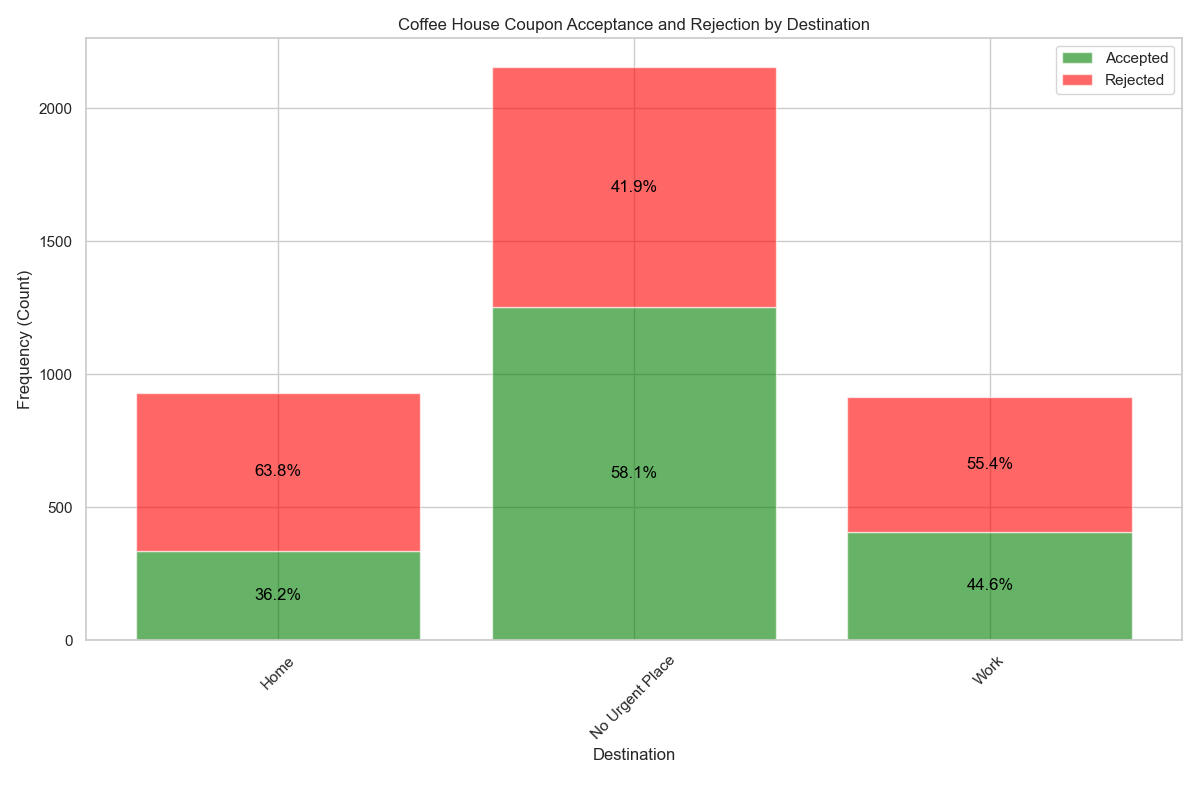
                <em>Figure: Coffee House Coupon Acceptance and Rejection by Destination</em>
            </td>
        </tr>
    </table>
</div>

The above visualization underscores the importance of considering the destination in marketing strategies and customer engagement initiatives. By understanding the preference patterns, businesses can tailor their offerings more effectively.



In [32]:


# Group by destination and calculate counts and acceptance rates
destination_grouped = coffee_house_df.groupby('destination')
counts_destination = destination_grouped.size()
acceptance_counts_destination = destination_grouped['Y'].sum()

# Calculating rejection counts for destination
rejection_counts_destination = counts_destination - acceptance_counts_destination

# Preparing data for plotting by destination
plot_data_destination = pd.DataFrame({'Count': counts_destination, 'Accepted': acceptance_counts_destination, 'Rejected': rejection_counts_destination})
plot_data_destination = plot_data_destination.sort_index()  # Ordering by destination

# Creating the stacked bar chart with transparency for destination
plt.figure(figsize=(12, 8))
plt.bar(plot_data_destination.index, plot_data_destination['Accepted'], label='Accepted', color='green', alpha=0.6)
plt.bar(plot_data_destination.index, plot_data_destination['Rejected'], bottom=plot_data_destination['Accepted'], label='Rejected', color='red', alpha=0.6)

# Annotating each bar with percentages for destination
for idx, (index, row) in enumerate(plot_data_destination.iterrows()):
    total_count = row['Count']
    accept_count = row['Accepted']
    reject_count = row['Rejected']

    accept_percentage = (accept_count / total_count) * 100
    reject_percentage = (reject_count / total_count) * 100

    if accept_count > 0:
        plt.text(idx, accept_count / 2, f'{accept_percentage:.1f}%', ha='center', va='center', color='black')
    if reject_count > 0:
        plt.text(idx, accept_count + reject_count / 2, f'{reject_percentage:.1f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45)
plt.title('Coffee House Coupon Acceptance and Rejection by Destination')
plt.ylabel('Frequency (Count)')
plt.xlabel('Destination')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
coffee_destination_acceptance_image64 = base64.b64encode(buffer.getvalue()).decode()





markdown_text = f"""
# Analysis of Coffee House Coupon Offers by Destination

This section of our analysis focuses on the distribution of Coffee House coupon offers by destination, examining the patterns of acceptance and rejection.

## Key Observations

- **Varied Acceptance and Rejection Rates Across Destinations**:
  - **Home**: Out of 928 offers, 336 were accepted (36.2%) and 592 were rejected (63.8%).
  - **No Urgent Place**: This destination saw the highest acceptance rate with 1252 out of 2155 offers accepted (58.1%), while 903 were rejected (41.9%).
  - **Work**: Of the 913 offers, 407 were accepted (44.6%) and 506 were rejected (55.4%).

## Data Analysis Approach

- The data was grouped by 'destination' to calculate the count of offers, along with the numbers of accepted and rejected coupons.
- These figures were then represented in a stacked bar chart, providing a clear visual comparison between acceptance and rejection for each destination.

## Insights on Consumer Preferences

- The analysis reveals how consumer preferences for Coffee House coupons vary based on the destination.
- The destination, 'No Urgent Place' shows significantly higher acceptance rates, suggesting a preference for leisurely visits to coffee houses.
- The bar chart annotations display the acceptance and rejection percentages, offering deeper insights into consumer behavior.

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coffee_destination_acceptance_image64}"  alt="Coffee House Coupon Acceptance and Rejection by Destination" style="width: 80%;"/>
                <em>Figure: Coffee House Coupon Acceptance and Rejection by Destination</em>
            </td>
        </tr>
    </table>
</div>

The above visualization underscores the importance of considering the destination in marketing strategies and customer engagement initiatives. By understanding the preference patterns, businesses can tailor their offerings more effectively.

"""

display(Markdown(markdown_text))



# Expanded Analysis of Coffee House Coupons: Destination and Passenger Type

In our continued analysis of Coffee House coupon data, we have now expanded our focus to include a combination of 'destination' and 'passenger type'. This comprehensive approach has led to some intriguing discoveries.

## Key Findings

- **Dominance of 'No Urgent Place' Across the Board**: Consistently, 'No Urgent Place' emerged as the destination with the highest acceptance rate for Coffee House coupons, regardless of the passenger type. This aligns with the expectation of coffee shop visits being more casual and leisure-oriented.

- **Surprising Trends with Partners**: A notable observation is the high acceptance rate for coupons where 'Home' is the destination, particularly when traveling with a partner. This suggests a preference for enjoying coffee outings close to home when in the company of a significant other.

- **Data Gaps and Surprises**:
  - One of the more surprising aspects of the data was the lack of diversity in destinations when traveling with kids. The only destination recorded in these instances was 'No Urgent Place', indicating either a potential limitation in the data or a genuine trend in consumer behavior.

## Visual Representation and Analysis

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                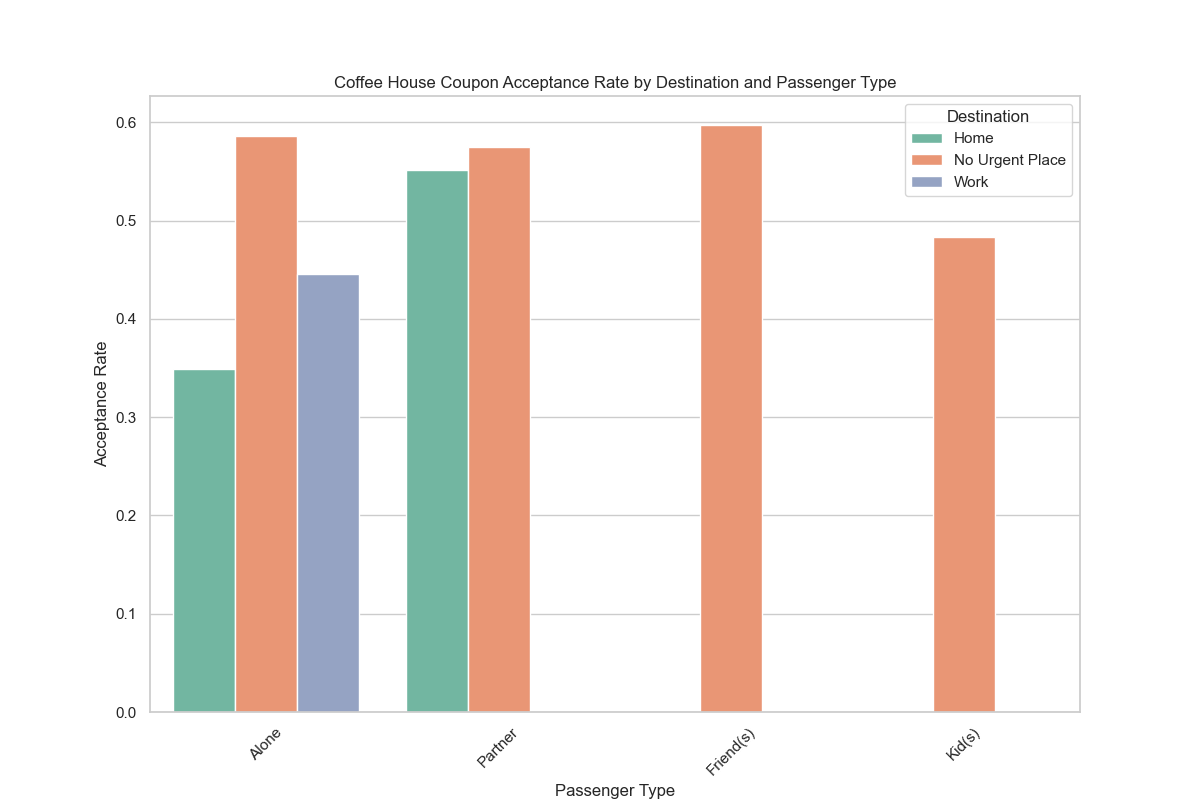
                <em>Figure: Acceptance Rates by Destination and Passenger Type</em>
            </td>
        </tr>
    </table>
</div>

This visual analysis aids in understanding how the choice of destination for Coffee House visits varies distinctly based on who the customers are with. It underscores the importance of considering both the destination and the companion type in tailoring marketing strategies for coffee shops.

## Conclusion

The expanded analysis sheds light on the nuanced preferences of customers based on their destinations and companions. These insights are vital for coffee shops aiming to craft more targeted and effective marketing campaigns.



In [33]:


# Define function to calculate acceptance rate
def calculate_acceptance_rate(group):
    total_coupons = len(group)
    accepted_coupons = group.sum()
    return accepted_coupons / total_coupons if total_coupons > 0 else 0

# Group by both destination and passenger and calculate acceptance rates
grouped_data = coffee_house_df.groupby(['destination', 'passenger']).agg({'Y': calculate_acceptance_rate}).reset_index()
grouped_data.rename(columns={'Y': 'Acceptance_Rate'}, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='passenger', y='Acceptance_Rate', hue='destination', data=grouped_data, palette='Set2')

# Setting labels and title
plt.title('Coffee House Coupon Acceptance Rate by Destination and Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.legend(title='Destination', loc='upper right')

buffer.seek(0)
plt.savefig(buffer, format='png')
plt.close()

# Encode the first plot image as a base64 string
coffee_destination_passenger_acceptance_image64 = base64.b64encode(buffer.getvalue()).decode()




markdown_text = f"""
# Expanded Analysis of Coffee House Coupons: Destination and Passenger Type

In our continued analysis of Coffee House coupon data, we have now expanded our focus to include a combination of 'destination' and 'passenger type'. This comprehensive approach has led to some intriguing discoveries.

## Key Findings

- **Dominance of 'No Urgent Place' Across the Board**: Consistently, 'No Urgent Place' emerged as the destination with the highest acceptance rate for Coffee House coupons, regardless of the passenger type. This aligns with the expectation of coffee shop visits being more casual and leisure-oriented.

- **Surprising Trends with Partners**: A notable observation is the high acceptance rate for coupons where 'Home' is the destination, particularly when traveling with a partner. This suggests a preference for enjoying coffee outings close to home when in the company of a significant other.

- **Data Gaps and Surprises**:
  - One of the more surprising aspects of the data was the lack of diversity in destinations when traveling with kids. The only destination recorded in these instances was 'No Urgent Place', indicating either a potential limitation in the data or a genuine trend in consumer behavior.

## Visual Representation and Analysis

<div align="center">
    <table>
        <tr>
            <td style="text-align: center;">
                <img src="data:image/png;base64,{coffee_destination_passenger_acceptance_image64}"  alt="Coffee House Coupon Acceptance Rate by Destination and Passenger Type" style="width: 70%;"/>
                <em>Figure: Acceptance Rates by Destination and Passenger Type</em>
            </td>
        </tr>
    </table>
</div>

This visual analysis aids in understanding how the choice of destination for Coffee House visits varies distinctly based on who the customers are with. It underscores the importance of considering both the destination and the companion type in tailoring marketing strategies for coffee shops.

## Conclusion

The expanded analysis sheds light on the nuanced preferences of customers based on their destinations and companions. These insights are vital for coffee shops aiming to craft more targeted and effective marketing campaigns.

"""

display(Markdown(markdown_text))


# Observations and Hypotheses on Drivers Accepting Coffee House Coupons
<br><br>



## Key Insights

1. **Balanced Overall Acceptance**: The overall acceptance rate for Coffee House coupons is around 50%, indicating an even consumer interest.
2. **Varied Acceptance by Passenger Type**: Solo drivers showed a lower than expected acceptance rate, while those with friends had the highest rate at 59%.
3. **Time Slot Analysis**: Popular times like 10 PM and 6 PM show higher acceptance rates, but there were no data points for solo drivers at 2 PM.
4. **Destination Impact**: 'No Urgent Place' emerged with the highest acceptance rates, and interestingly, 'Home' was a popular destination when traveling with a partner.
5. **Data Gaps and Surprises**: Notably, for passengers with kids, the only destination was 'No Urgent Place', indicating potential data limitations.

   

## Conclusion

The acceptance of Coffee House coupons by drivers is influenced by several factors, including passenger type, time of day, destination, and potentially missing data points. The analysis highlights the need for comprehensive data collection to accurately gauge consumer behavior and preferences. Understanding these nuanced factors is essential for businesses to tailor their marketing strategies effectively, particularly in targeting the right audience segments.

In [34]:
df_cleaned.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'travel_time_category', 'income_bracket'],
      dtype='object')

In [35]:
df_cleaned['has_children'].value_counts()


0    7431
1    5253
Name: has_children, dtype: int64